In [1]:
%load_ext autoreload
%autoreload 2

# Линейная регрессия

Всем привет. В данном уроке мы разберём такую тему как линейная регрессия. 

Мы рассмотрим какие виды проблем решает линейная регрессия и поговорим про то, как можно использовать математику для решения этих проблем. 

В этом уроке мы разберем линейные функции, функцию потерь, производную и поговорим про один из самый популярный и самых полезный алгоритм машинного обучения - градиентный спуск.

Но просто рассматривать теорию без реализации не слишком полезно. Поэтому мы также реализуем все эти функции и алгоритмы на Python и NumPy.

И первый вопрос который мы сейчас рассмотрим это - ***почему мы изучаем линейную регрессию, а не глубокие нейронные сети?*** 

Многие из вас наверняка уже слышали про линейную регрессию в университете или в даже в школе. И сейчас вы задаетесь вопросом: а почему мы будем изучать ее, а не что-то что сейчас на слуху, например, нейронные сети. 

Во-первых, линейная регрессия довольно простая для понимания, но при этом, идеи, которые мы сегодня рассмотрим на примере линейной регрессии повсеместно применяются в машинном обучении. Например, алгоритм обучения линейной регрессии также используется и в нейронных сетях (с небольшими доработками).

Во-вторых, пускай линейная регрессия и является довольно старой идеей, она до сих применяется для решения многих задач. Она встроена во многие базы данных, такие как ClickHouse и даже доступна в Excel.

## Данные

### Постановка задачи 

Давайте представим, что к нам пришли социологи из какого-то университета, например, ВШЭ или ФизТеха.
Они опросили студентов и узнали какую часть свободного времени они тратят на учебу. Назовем это $X$.  А также они знают среднюю оценку студента по всем предметам. Обозначим это как $y$. Это социологи из новомодного университета, где десятибалльная система. 

И они хотят научиться по доли потраченного на учебу времени определять среднюю оценку студента. У них есть несколько примеров данных где есть пары $х$ и $у$. 

То есть, наша задача найти зависимость между $Х$ и $y$. 

То есть, нужно найти функцию $f(X) = y$, где $X$ это доля потраченного на учебу времени, а $y$ это средняя оценка. В общем случае это и есть задача регрессии.


Можно представить, что эти пары ($x$, $y$) - это значения функции $f(X)$ в точках $Х$. И задача регрессии — это построить функцию (некую линию) которая может *описать* эти данные.

Например,

*нам говорят, Х=0.1. Мы берем это число, помещаем ее нашу функцию и получаем значение для у.* 

$f(0.1) = 3$

*И мы говорим в ответ: у=3*.

*Другой пример регрессии*. У нас есть интернет сайт, и мы хотим предсказать сколько посетителей у нас будет в определенное время, при этом у нас есть статистика посещений сайта от времени. Наша задача - используя имеющиеся данные о загруженности в прошлом, предсказать количество посетителей в интересующие нас время. 

То есть по имеющимся данным построить зависимость интересующей нас переменной от каких то других параметров.

В общем случае задача регрессии - это по входным данным найти число в каком-то *непрерывном* диапазоне. Например: $(-1, 1)$ или же $R$.

Рассмотрим подробнее пример с $Х$ и $y$.

Давайте загрузим данные. Для этого воспользуемся функциями, которые я подготовил специально для этого урока.

В первой строчке мы подгрузим все вспомогательные функции, которые мы сегодня будем применять. 

Вторая строчка подгружает библиотеку NumPy, c помощью которой мы будем сегодня реализовывать все алгоритмы. 

В третьей строки мы загружаем данные.

In [2]:
from regression_helper import * # Подгружаем функции для визуализации
import numpy as np              # Подгруджаем библиотеку NumPy

X, y = get_data()               # Загружаем данные в X и y

После этого в векторе $X$ содержится доля свободного времени студента, потраченная на учебу, а в векторе $y$ средняя оценка. 

А теперь давайте посмотрим на эти данные.

In [3]:
visualize_Xy(X, y)    

    Доля свободного времени, потраченного на учебу  Средняя оценка
0                                             0.10            3.18
1                                             0.12            4.80
2                                             0.13            3.31
3                                             0.13            4.18
4                                             0.14            4.03
5                                             0.18            5.08
6                                             0.21            5.31
7                                             0.26            5.35
8                                             0.26            5.61
9                                             0.26            5.52
10                                            0.28            6.31
11                                            0.29            6.64
12                                            0.29            5.47
13                                            0.35            

$X$ и $y$ - это массивы NumPy ndarray с 20 элементами. 

Выведем тип $X$ и тип $y$.

In [4]:
print(f"Тип переменной X: {type(X)}")
print(f"Тип переменной y: {type(y)}")

Тип переменной X: <class 'numpy.ndarray'>
Тип переменной y: <class 'numpy.ndarray'>


Ну давайте тогда и на значения посмотрим.

Значения массива X:

In [5]:
print(X)

[0.1  0.12 0.13 0.13 0.14 0.18 0.21 0.26 0.26 0.26 0.28 0.29 0.29 0.35
 0.35 0.43 0.46 0.47 0.48 0.48]


Значения массива y:

In [6]:
print(y)

[3.18 4.8  3.31 4.18 4.03 5.08 5.31 5.35 5.61 5.52 6.31 6.64 5.47 7.83
 7.63 9.04 9.11 9.83 9.42 8.71]


И давайте договоримся, когда я буду писать $X_i$ в тексте - это будет эквивалентно обращению к $i$-тому элемента массива $X$. Или тоже самое что ***X[i]*** в коде.

In [7]:
print(X[0])

0.1


Как можно заметить, значение $X[0]$ равно значению нулевого элемента X, выведенного выше.

Отобразим эти данные на графике. Черные точки - это пары $х$, $у$.

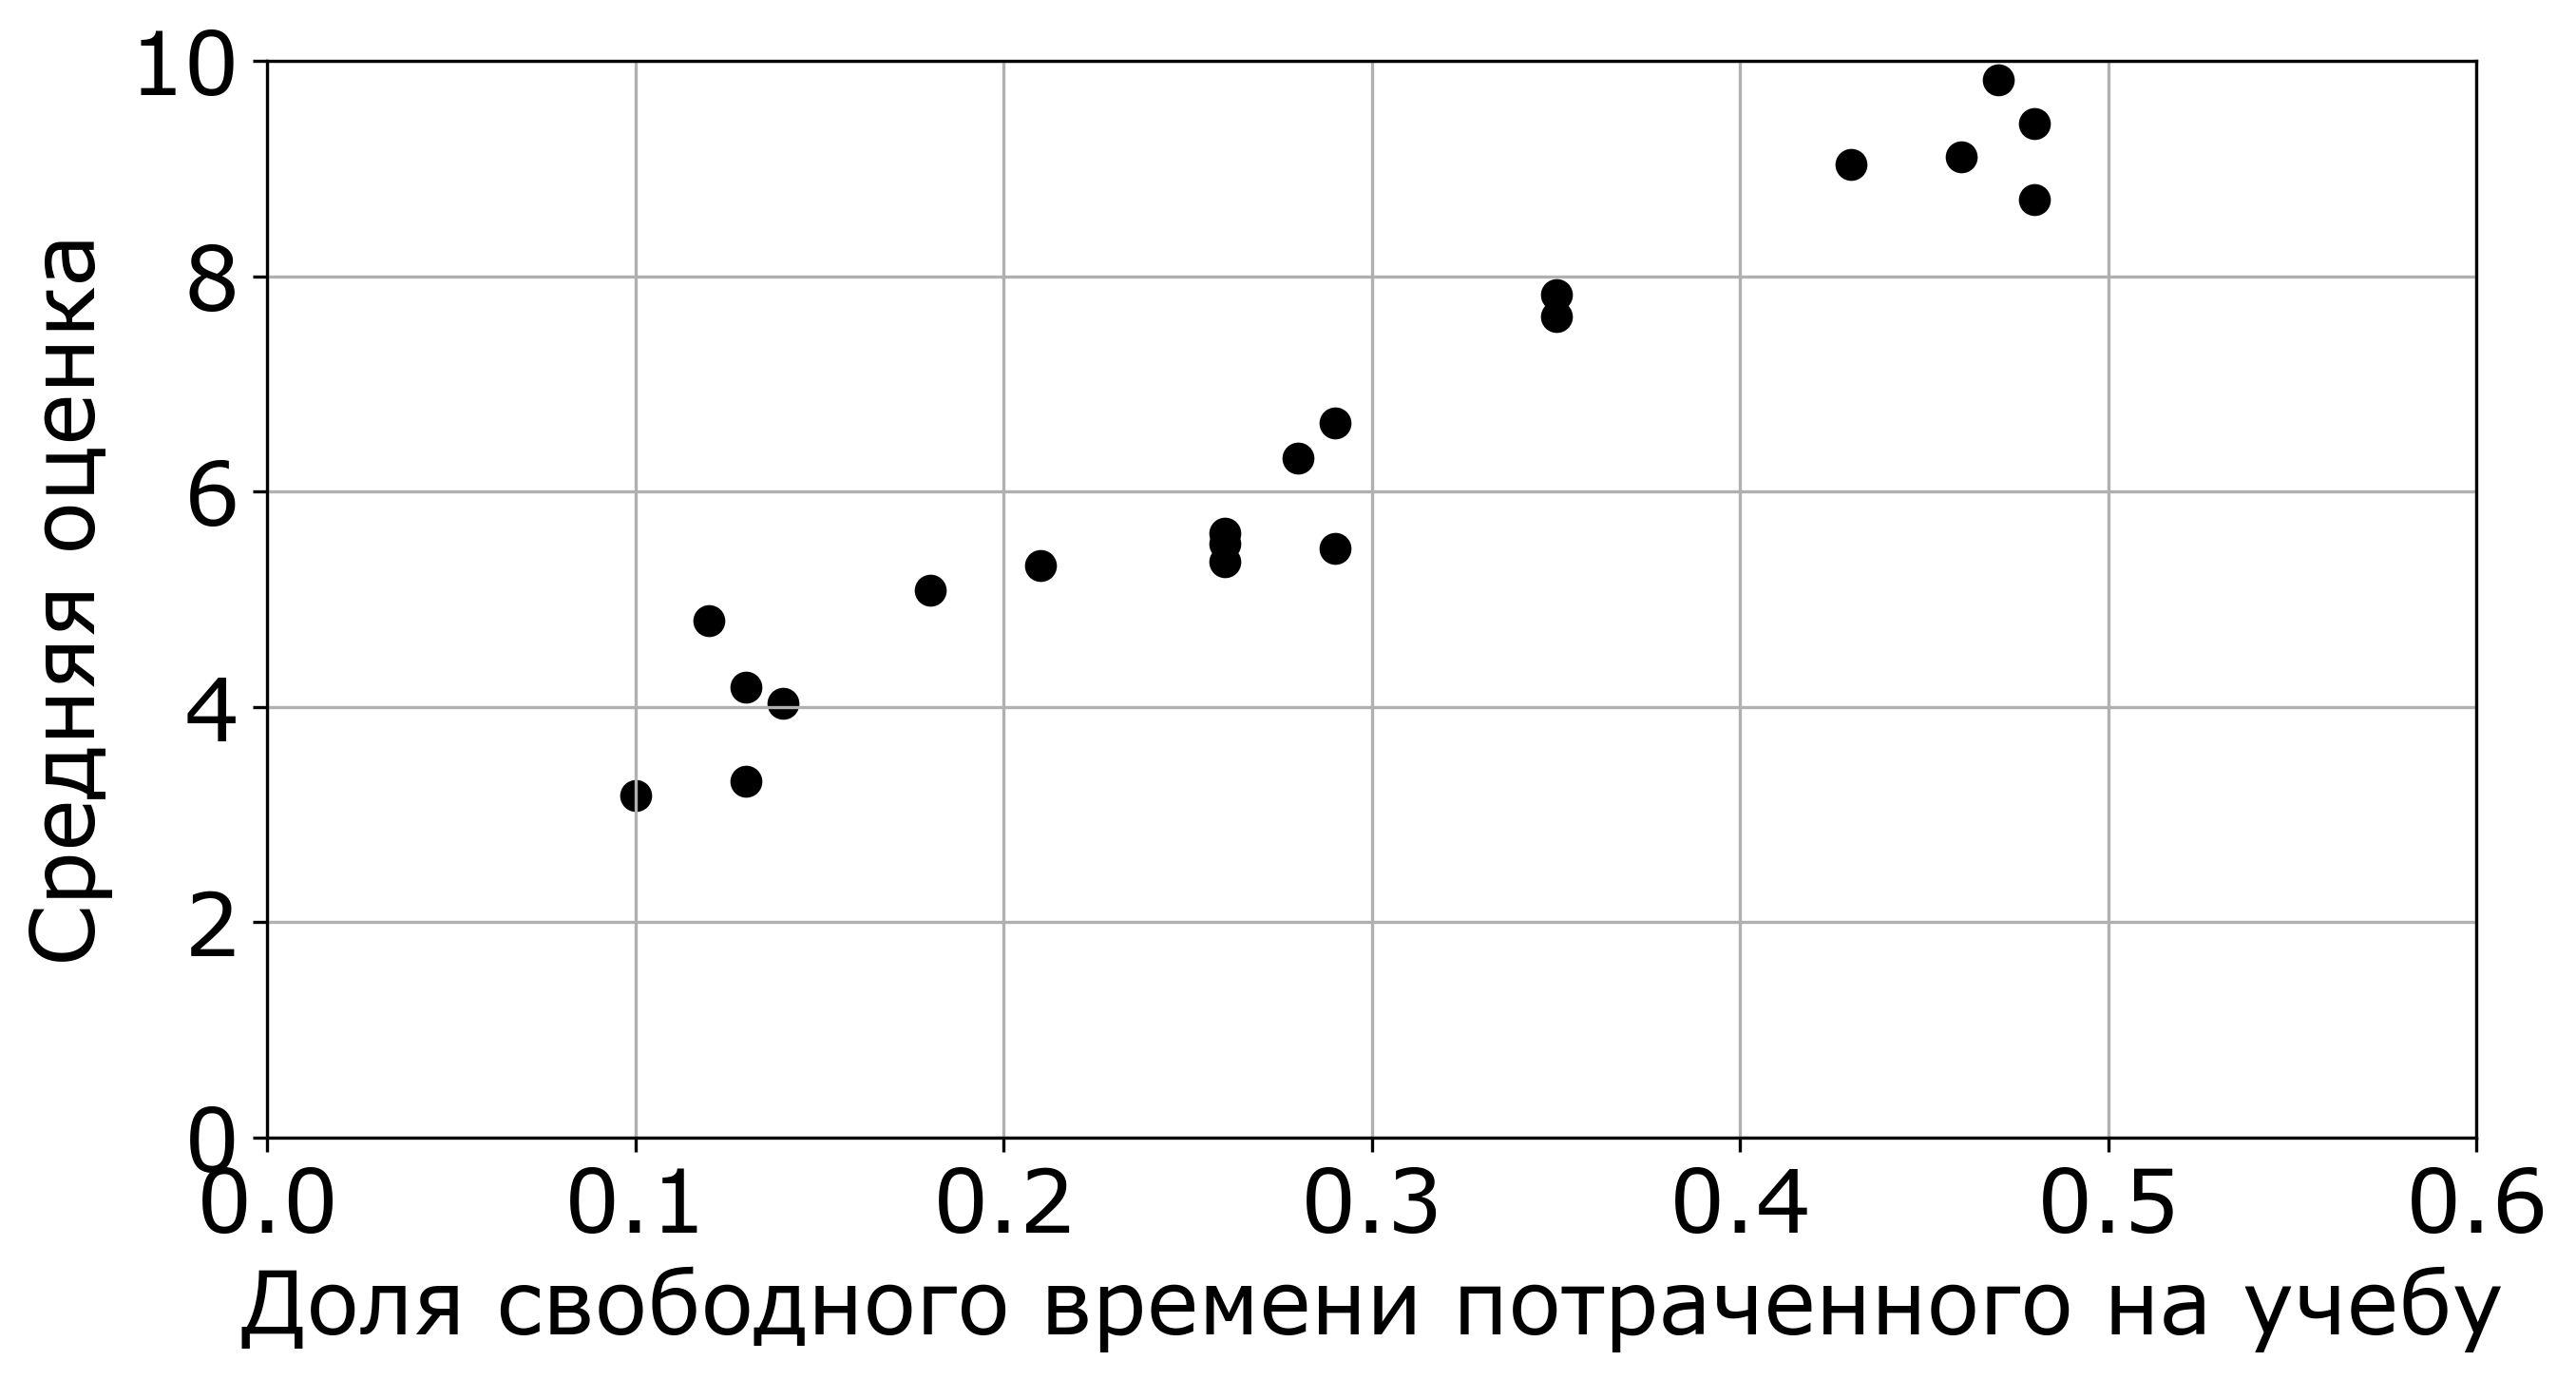

In [8]:
# Строим график с точками
plot_data(X, y)      

## Линейная функция

Мы видим, что чем больше $y$, тем выше $y$. Можно сделать вывод, что между этими данными есть зависимость.

А еще можно заметить, что точки примерно лежат на одной линии.

То есть, эти точки можно описать какой-то линией, к которой прибавляется случайная ошибка (шум). За счет этого точки лежат не ровно на прямой, а как бы "вокруг" нее.

Это позволяет нам предположить, что данная зависимость может описаться линейной функцией вида:

$y = kX$, 

где $X$ это доля времени студента, $y$ средняя оценка, а $k$ - это некий коэффициент. Также $k$ называют параметром функции и весом функции.

Давайте посмотрим, как выглядят функции вида $y = kX$ с разными коэффициентами $k$.

Двигая слайдер можно менять значение коэффициента. Черные точки это наши данные. Ну а черная линяя - это функция $y=kX$ с различными значения $k$.

Как видно по графику, наша функция $y=kX$ это линия. Ну а сам такой вид функции называется линейной функцией.

In [9]:
choose_slope(X, y)

interactive(children=(FloatSlider(value=10.0, description='k', max=40.0, step=2.0), Output()), _dom_classes=('…

График - это конечно хорошо. Нам нужно как-то применять эту функцию для предсказания значений.

Давайте реализуем линейную функцию на Python.

Небольшая ремарка. 

Перед каждой ячейкой с кодом будет текст с задачей, которая решает этот код и описание выходных и выходных данных.


Самая простая реализация линейной функции в самом простом виде выглядит так:

Для каждого элемента $X_i$ массива $X$ реализовать функцию $f(X_i) = kX_i$.

На входе:
* Массив ndarray $X$;

* Значение коэффициента $k$;

На выходе:

* На выходе массив ndarray со значениями $f(X_i) = kX_i$;

In [10]:
def dummy_f(X, k):
    # Создаем результирующий список, где будем сохранять значения функции
    result = []                  
    
    # Переменная i в цикле будет менять свое значение в диапазоне (range) от 0 до размера массива X (len(X))
    for i in range(len(X)):    
        
        # Считаем значение y для i-этого элемента массива X
        y_i = k*X[i]    
        
        # Добавляем результат в результирующий список
        result.append(y_i)
        
    # Создаем из списка массив ndarray    
    return np.array(result)

print(dummy_f(X, 1))

[0.1  0.12 0.13 0.13 0.14 0.18 0.21 0.26 0.26 0.26 0.28 0.29 0.29 0.35
 0.35 0.43 0.46 0.47 0.48 0.48]


Но это не самая лучшая реализация. 

Можно воспользоваться возможностями NumPy. Из предыдущего урока по NumPy мы знаем, что в нем есть операция умножения массива на скаляр. Давайте ей воспользуемся.

Для каждого элемента $X_i$ массива $X$ реализовать функцию $f(X_i) = kX_i$.

На входе:
* Массив ndarray $X$;

* Значение коэффициента $k$;

На выходе:

* На выходе массив ndarray со значениями $f(X_i) = kX_i$;

In [11]:
def f(X, k):
    # Используем возможность ndarray и умножим массив X на скаляр k
    # Результат этой операции это ndarray
    return k*X

print(f(X, 1))

[0.1  0.12 0.13 0.13 0.14 0.18 0.21 0.26 0.26 0.26 0.28 0.29 0.29 0.35
 0.35 0.43 0.46 0.47 0.48 0.48]


Эта функция выглядит очень компактно и можно заметить, что результаты совершенно одинаковы.

При этом, эта функция также работает и для одного элемента.

In [12]:
print(f(X[0], 1))

0.1


Функция не только выглядит проще и компактнее, но также она и во много раз быстрее.

Разница во времени выполнения функций dummy_f и f на массиве ndarray с 100000 элементов.

Функция                | Среднее время (микросекунд) 
-----------------------|-----------------------------
dummy_f     | 31400                       
f                      | 70                          

Как видно из таблицы, функция, написанная с помощью NumPy быстрее в 45 раз!

*Примечание: время выполнения может отличаться на разных компьютерах.*


## Функция ошибки

Ок. Мы научились реализовывать линейную функцию для различных $k$. Но это нам не отвечает на вопрос о том, какое $k$ подходит нам лучше всего.

Давайте снова посмотрим на различные линейные функции с различными $k$.

In [13]:
choose_slope(X, y)

interactive(children=(FloatSlider(value=10.0, description='k', max=40.0, step=2.0), Output()), _dom_classes=('…

У нас есть различные линейные функции с различными $k$. Но как определить какая из них лучшая? И желательно сделать это так, чтобы это можно было запрограммировать.

Для это введем **функцию ошибку**, также известную как **функцию потерь** или **loss function**. 

Функция ошибки - численное значение того, насколько хорошо наша функция описывает данные. В данном случает это то, насколько предсказанные значения нашей функции отличаются от реальных.

Обозначается функция потерь как $Loss$, $L$ или $J$. Мы будем использовать $Loss$.

Лучше всего не использовать значение $L$. $L$ - часто используется как обозначение для функции правдоподобия, которая также часто используется в машинном обучении.

Давайте визуализируем разницу между точками которые предсказывает функция $f(X) = kX$ и реальными данными.

Опять же, черные точки - это реальные значения. Крестики - это предсказанаые значения в точках $X$. А красная линия это разница между придсказаными значениями и реальными.

In [14]:
plot_data_and_error(X, y)

interactive(children=(FloatSlider(value=10.0, description='k', max=40.0, step=2.0), Output()), _dom_classes=('…

Эту разницу можно использовать для оценки нашей функции $f(X) = kX$, конкретно оценки параметра $k$.

Пусть у нас есть функция:  

$\widetilde{y} = f(X) = kX$

Тогда $\widetilde{y}$ - это предсказанные нами значения для $X$. 

А настоящие значения будут равны $y$. 

Тогда ошибку нашего предсказания на $i$-ом примере $\widetilde{y}_i$ можно посчитать как: 

$error = \widetilde{y}_i - y_i$

Если нам не важно в большую или в меньшую сторону мы ошибаемся, можем избавиться от знака, взяв либо модуль, либо квадрат ошибки. Для начала давайте возьмем квадрат. О модуле мы поговорим в следующих уроках. Тогда ошибка $loss_i(k)$ на $i$-ом примере будет равна:

$loss_i(k) = (\widetilde{y}_i - y_i)^2$

$loss_i(k) = (kX_i - y_i)^2$


Давайте посмотрим на значения ошибок для наших точек для коэффициента $k = 25$.

In [15]:
k = 25
error_on_sample(X, y, k)

Разница на примере 0 равна -0.68
Разница на примере 1 равна -1.8
Разница на примере 2 равна -0.06
Разница на примере 3 равна -0.93
Разница на примере 4 равна -0.53
Разница на примере 5 равна -0.58
Разница на примере 6 равна -0.06
Разница на примере 7 равна 1.15
Разница на примере 8 равна 0.89
Разница на примере 9 равна 0.98
Разница на примере 10 равна 0.69
Разница на примере 11 равна 0.61
Разница на примере 12 равна 1.78
Разница на примере 13 равна 0.92
Разница на примере 14 равна 1.12
Разница на примере 15 равна 1.71
Разница на примере 16 равна 2.39
Разница на примере 17 равна 1.92
Разница на примере 18 равна 2.58
Разница на примере 19 равна 3.29


Как можно заметить, в начале разница отрицательная, а в после 6-го примера она становиться положительной.

Давайте посмотрим на квадрат разности между предсказанными значение и реальным для коэффициента $k = 1$.

In [16]:
k = 25
quad_error_on_sample(X, y, k)

Квадрат разницы на примере 0 равен 0.4624
Квадрат разницы на примере 1 равен 3.24
Квадрат разницы на примере 2 равен 0.0036
Квадрат разницы на примере 3 равен 0.8649
Квадрат разницы на примере 4 равен 0.2809
Квадрат разницы на примере 5 равен 0.3364
Квадрат разницы на примере 6 равен 0.0036
Квадрат разницы на примере 7 равен 1.323
Квадрат разницы на примере 8 равен 0.7921
Квадрат разницы на примере 9 равен 0.9604
Квадрат разницы на примере 10 равен 0.4761
Квадрат разницы на примере 11 равен 0.3721
Квадрат разницы на примере 12 равен 3.168
Квадрат разницы на примере 13 равен 0.8464
Квадрат разницы на примере 14 равен 1.254
Квадрат разницы на примере 15 равен 2.924
Квадрат разницы на примере 16 равен 5.712
Квадрат разницы на примере 17 равен 3.686
Квадрат разницы на примере 18 равен 6.656
Квадрат разницы на примере 19 равен 10.82


Теперь вся разница положительная.

Давайте посмотрим, как это можно реализовать в Python.

In [17]:
k = 25
# f(X, k) возвращает массив ndarray
# y также массив ndarray
# И как мы помним из предыдущего урока, в NumPy реализована возможность поэлементной разности между массивами
errors = f(X, k) - y

print(errors)

[-0.68 -1.8  -0.06 -0.93 -0.53 -0.58 -0.06  1.15  0.89  0.98  0.69  0.61
  1.78  0.92  1.12  1.71  2.39  1.92  2.58  3.29]


Теперь, за счет того, что в NumPy есть возможность поэлементного возведение в степень, посчитать квадратичную разность не составит труда.

In [18]:
k = 25
quad_errors = (f(X, k) - y)**2
print(quad_errors)

[4.62400e-01 3.24000e+00 3.60000e-03 8.64900e-01 2.80900e-01 3.36400e-01
 3.60000e-03 1.32250e+00 7.92100e-01 9.60400e-01 4.76100e-01 3.72100e-01
 3.16840e+00 8.46400e-01 1.25440e+00 2.92410e+00 5.71210e+00 3.68640e+00
 6.65640e+00 1.08241e+01]


Мы научились оценивать ошибку предсказание на каждом примере. И у нас есть массив значений. Но хотелось бы иметь ровно одно число, которое даст оценку нашей функции. Сделать это довольно просто.

Мы можем посчитать среднюю ошибку $Loss(k)$ на всех примерах:

$\widetilde{y}_i = f(X_i) = kX_i$

$Loss(k) = \dfrac{1}{N} \sum_{i=0}^{N}{(\widetilde{y}_i - y_i)^2}$ 

$Loss(k) = \dfrac{1}{N} \sum_{i=0}^{N}{(f(X_i) - y_i)^2}$

$Loss(k) = \dfrac{1}{N} \sum_{i=0}^{N}{(kX_i - y_i)^2} $

Где $N$ - это количество примеров.

Такая функция ошибки называется **среднеквадратичная ошибка (СКО)** или **mean squared error (MSE)**.


***Немного про нотацию***.

Функция потерь формально зависит от входных данных, реальных выходных данных, вида функции и параметров этой функции. 

То есть, $Loss(X, y, f, k)$. Но обычно, для краткости, мы предполагаем, что мы используем текущие $X$, $y$ и $f$ и пишем, что функция потерь зависит только от параметров функции -  $Loss(k)$.

Таким образом, сама функция потерь - это функция от одной переменной (параметра) $k$. То есть, это зависимость между выбранным параметром и ошибкой, которая у нас будет после предсказания с этим параметром.

Давайте реализуем функцию ошибки.

Для массива $X$ и реального значения $y$ необходимо реализовать функцию ошибки. 

На входе:


* Массив входных значений $X$;

* Массив реальных  выходных значений $y$;

* Коэффициент $k$ функции $f(X)=kX$;


На выходе:

* На выходе значение функции ошибки $Loss(k)$;

Формула функции ошибки:

$Loss(k) = \dfrac{1}{N} \sum_{i=0}^{N}{(kX_i - y_i)^2} $


In [19]:
def loss_function(X, y, k):
    
    N = X.shape[0]                    # получаем размер вектора столбца
    # или N = len(X)
   
    # создаем массив ошибок для каждого примера
    loss_for_sample = (k*X - y)**2
    
    # берем среднее значение
    loss = np.sum(loss_for_sample) / N      
    
    # или если переписать проще 
    # loss = np.mean((k*X - y)**2)
    return loss

k = 25
print(loss_function(X, y, k))

2.209365


Давайте рассмотрим ошибки для разных $k$.

In [20]:
plot_data_and_loss(X, y)

interactive(children=(FloatSlider(value=10.0, description='k', max=40.0, step=2.0), Output()), _dom_classes=('…

Давайте теперь визуализируем всю функцию ошибки для всех функция значений $k$.

*Небольшая ремарка: функция ошибки ниже была получена не аналитически. Она была посчитана для огромного количества параметров $k$ от 0 до 40*.

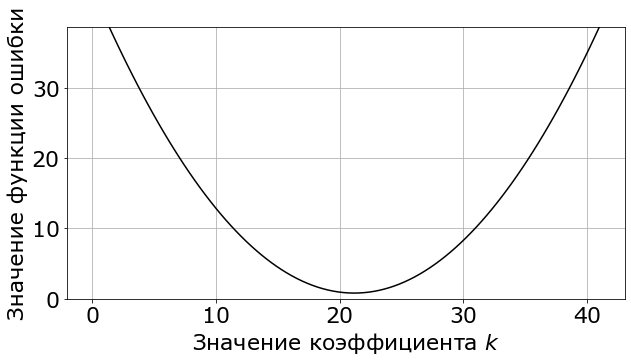

In [21]:
plot_all_loss(X, y)

По графику видно, что если взять коэффициент $k$ = 10, то мы получим ошибку равную около 15. И можно заметить, что минимальное значение функции достигается около 20.

## Производная функции

Наша задача - это минимизации функции ошибки. То есть, нужно найти такое $k$, для которого функция $Loss(k)$ имеет минимальное значение.

Для решения этой задачи обратимся к математике.

Давайте вспомним что такое *производная функции*.

### Определение

Производная функции $f(x)$ записывается как $f'(x)$ или же как $\dfrac{d f(x)}{dx}$. Мы будем применять оба варианта.

Сама производная это то, насколько значение функции меняется в зависимости от изменения входного значения. 

*Математически это выглядит так:*

$f'(x_0) = lim_{\Delta x \rightarrow 0}\dfrac{\Delta y}{\Delta x} = lim_{\Delta x \rightarrow 0}\dfrac{f(x_0+\Delta x) - f(x_0)}{\Delta x}$

Звучит очень здорово, но очень не понятно.

Давайте посмотрим на не самое математичное определение.

Пусть у нас есть некая функция $y = f(x)$.

Возьмем точку $x_0$. Мы можем получить значение функции в этой точки $y_0 = f(x_0)$. 

А теперь возьмем точку рядом с $x_0$. Это можно сделать прибавив (или отняв) от $x_0$ какое-нибудь маленькое значение. Назовем его $\Delta x$. 

То есть, мы получаем $y_1 = f(x_0 + \Delta x)$.

Теперь посмотрим на разницу между значениями функции в точке $x_0$ и $x_0 + \Delta x$

Она записывается как $\Delta y$.

$\Delta y = f(x_0 + \Delta x) - f(x_0)$

И если разделить $\Delta y$ на $\Delta x$ то это и будет производная в точке $x_0$.


То есть, производная равна:

$f'(x_0) = \dfrac{d f(x_0)}{dx} $

$f'(x_0) = \dfrac{\Delta y}{\Delta x} = \dfrac{f(x_0+\Delta x) - f(x_0)}{\Delta x}$

Но очень важно, что бы $\Delta x$ был очень маленьким числом. Обычно говорят, что $\Delta x$ стремится к 0. И пишут это как $\Delta x \rightarrow 0$

### Геометрическая интерпритация

Посмотрим на функцию $f(x) = x^2 + 1.5$. Это функция параболы. 

На ее примере попробуем получить интуитивное понимание производной. 

Давайте еще раз перепишем формулу для производной.

$\Delta y = f(x_0+\Delta x) - f(x_0)$

$f'(x_0) = \dfrac{\Delta y}{\Delta x}$

#### Возврастающая функция в точке

 Рассмотрим пример производной для нее в точке $x_0 = 1.4$.

In [22]:
x0 = 1.4
derivation(x0)

interactive(children=(FloatSlider(value=1.5, description='$\\Delta x$', max=1.5, min=-1.0, step=0.10001), Outp…

Красная точка - это значение функции $f(x_0)$ в точке $x_0$. 

Синяя точка - это значение функции $f(x_0+\Delta x)$ в точке $x_0+\Delta x$. 

Двигая слайдер, можно уменьшать значение $\Delta x$.

Между синей и крестной точки проведена секущая. Угол между ней и осью $X$ обозначим как $\alpha$. 

Рассмотрим треугольник с катетами ${\Delta y}$ и ${\Delta x}$. Угол между катетом ${\Delta x}$ и гипотенузой тоже будет равен $\alpha$.  

Из геометрии мы знаем что $tg(\alpha) = \dfrac{\Delta y}{\Delta x}$

Устремляя $\Delta x$ мы получаем производную. При этом, наша секущая между синей и красной точки стала касательной к функции в точке $x_0$.

И мы получили $f'(1.4) = 2.8$. 

#### Убывающая функция в точке.

Рассмотрим пример производной для функции в точке $x_0 = -1.3$.

In [23]:
x0 = -1.3
derivation(x0)

interactive(children=(FloatSlider(value=-1.0, description='$\\Delta x$', max=1.5, min=-1.0, step=0.10001), Out…

Все тоже самое. Уменьшая $\Delta x$ мы получаем производную. И наша секущая становиться касательной.

Но можно заметить, что теперь наша касательная направлена в другую сторону, на убывание. И само значение производной стало отрицательной.

Можно считать, что производная в точке показывает "скорость" изменения функции. Она положительна если функция растет вокруг точки и отрицательна, когда функция убывает.

Еще ее можно интерпретировать как тангенс угола наклона $\alpha$ касательной к точке.

Обычно пишут что $f'(x_0) = tg(\alpha)$.

То есть, если производная **положительная** в точке $x_0$, и мы возьмем значение немного *больше* чем $x_0$, то мы увидим, что значение функции в новой точке *возросло*. А если взять значение *меньшее* $x_0$, то значение функции будет *меньше* чем в точке $x_0$.

Наоборот с отрицательным значением производной. Если производная **отрицательна** в точке $x_0$, и мы возьмем значение чуть *больше* чем $x_0$, то мы увидим, что значение функции *уменьшилось*. А если взять значение *меньшее* $x_0$, то значение функции будет *больше* чем в точке $x_0$.

Доказательство положительной производной для возрастающей функции находится в конце ноутбука в приложении.

#### Производная в экстремуме

Рассмотрим поведение производной в экстремумах. 

Экстремум - это точка при которой функция принимает максимальные и минимальные значения.

In [24]:
x0 = 0
derivation(x0)

interactive(children=(FloatSlider(value=1.5, description='$\\Delta x$', max=1.5, min=-1.0, step=0.10001), Outp…

То есть, в точках минимума и максимума производная равна 0. 

#### Аналитический вывод производной

Давайте получим производную аналитически.

Напомню, наша функция выглядит как $f(x) = x^2 + 1.5$.

В какой-то точке $x_0$ производная будет равна:

$f'(x_0) = \dfrac{f(x_0+\Delta x) - f(x_0)}{\Delta x}$

$f(x_0+\Delta x) = (x_0 + \Delta x)^2 + 1.5 = x_0^2 + 2x_0\Delta x + \Delta x^2 + 1.5$

$ \dfrac{f(x_0+\Delta x) - f(x_0)}{\Delta x} = \dfrac{x_0^2 + 2x_0\Delta x + \Delta x^2 + 1.5 - (x_0^2 + 1.5) }{\Delta x} = \dfrac{2x_0\Delta x + \Delta x^2}{\Delta x}$

$\dfrac{2x_0\Delta x + \Delta x^2}{\Delta x} = 2x_0 + \Delta x$

И если мы будем считать $\Delta x$ очень маленьким числом, тогда 

$f'(x_0) = 2x_0$

И если подставить значения для наших функций, то все должно сойтись с тем, что мы нашли исходя из геометрических соображений.
 
 $f'(1.4) = 2 \cdot 1.4 =  2.8$
 
 $f'(-1.3) = 2 \cdot (-1.3) = -2.6$

Как вы помните из школьного курса, обычно производные считаются аналитически с помощью таблиц и особых правил, о которых мы говорим далее.

И нет необходимости каждый раз использовать определение производной для ее подсчета.

Давайте посмотрим на производную для всех точек.

In [25]:
plot_simple_func_and_der()

interactive(children=(FloatSlider(value=2.0, description='$x$', max=2.0, min=-2.0), Output()), _dom_classes=('…

#### Так зачем нам это все? Как это поможет нам решить проблему?

Я вам напомню, что наша задача найти минимум нашей функции потеть $Loss(k)$.

Чем же производная может нам помочь?

Вернемся к нашей функции ошибки посмотрим на ее производные в разных точках:

In [26]:
plot_data_and_loss(X, y, with_der=True)

interactive(children=(FloatSlider(value=10.0, description='k', max=40.0, step=2.0), Output()), _dom_classes=('…

Допустим мы видим что производная равна отрицательному значению. Это значит что функция ошибки в окрестности данной точки убывает. То есть, если взять $k$ поменьше, то ошибка будет расти, а если по больше, то ошибка будет убывает.

А теперь допустим производная положительна. Это значит что функция ошибки в окрестности данной точки возрастает. То есть, если взять $k$ побольше, то ошибка будет расти, а если поменьше, то ошибка будет убывать.

Тогда найти минимальное значение функции ошибки довольно просто.

Тогда найти минимальное значение функции ошибки довольно просто.

Мы берем случайное значение $k$. Считаем значение производной для этого параметра. Если производная положительная, берем новое $k$ чуть меньше чем было, если производная отрицательная, то берем новое значение для $k$ чуть побольше. Это все повторяем до тех пор, пока нас не устроит значение ошибки.

Но сначала давайте возьмем производную от нашей функции ошибки. Для этого рассмотрим следующие свойства производной.

#### Свойства производных

##### Элементарные функции

Сначала посмотрим на таблицу с производными для элементарных функций (некоторых).

| Элементарная функция $f(x)$ | Производная $\dfrac{df(x)}{dx}$
| -----  | --- |
|  $a$   |  0  |
|  $x$   |  1  |
|  $ax$  |  a  |
|  $x^2$  |  $2x$ |
|  $x^n$  |  $nx^{n-1}$ |
|  $\ln(x)$  |  $\dfrac{1}{x}$ |
|  $ \sin (x)$  | $\cos (x)$  |
|  $\cos(x)$   |  $-\sin (x)$ |
|  $e^x$   |  $e^x$ |
|  $a^x$   |  $a^x \ln (a)$ |

$a$ - это константа.

*Пример:*

$\dfrac{dx^3}{dx} = (x^3)' = 3x^2$

##### Производная функции умноженную на константу

Если функция умножается на константу, то производная берётся от функции без константы, затем это константа домножается на производную.

$(af(x))' = af'(x)$

*Пример:*

$(10x)' = 10$

$(20.1 x^3)' = 20.1 \cdot 3 x^2 = 60.3 x^2$

##### Производная суммы

Производная суммы (разности) равна сумме (разности) производных:

Для двух функций:
$(f_1(x) + f_2(x))' = f_1'(x) + f_2'(x)$

В общем случае: $\left(\sum_n f_n(x) \right)' = \sum_n f_n'(x)$

То есть, когда мы берем производную от суммы мы берем производную от каждого слагаемого и суммируем полученые производные.

*Пример:*

$f(x) = 3x^2 + 20ln(x) + 3$

$f'(x) = (3x^2 + 20ln(x) + 3)'$

$f'(x) = (3x^2)' + (20ln(x))' + (3)'$

$f'(x) = 3\cdot2x + 20\cdot \dfrac{1}{x} + 0$

$f'(x) = 6x + \dfrac{20}{x}$

##### Производная сложной функции

При взятии производной сложной функции использоваться цепное правило (chain rule).

Интуитивное понимание. Мы смотрим какой порядок вычисления операций и вычисляем производную с последней операции по первую и перемножая их.

Но что это значит?

Например, у нас есть функция $f(x) = sin(e^{3x})$.

Что бы вычислить эту функцию нужно сначала рассчитать $u = 3x$. Затем $v = e^u$. И наконец $y = sin(v)$.

То есть:

1. $u = 3x$

2. $v = e^u$

3. $y = sin(v)$

А что бы вычислить производную мы идем в обратном порядке. Сперва мы просто берем производную синуса (считая все то что в скобках за одну переменную), затем производную от экспоненты и наконец производную множителя.

$\dfrac{df(x)}{dx} = \dfrac{d (sin(v))}{dv} \dfrac{d (e^u)}{du} \dfrac{d (3x)}{x} $

$\dfrac{df(x)}{dx} = cos(v) \cdot e^u \cdot 3x = cos(e^{3x}) \cdot e^{3x} \cdot 3x$


Математически это так:

$v = \psi(x)$

$u = \phi(v)$

$y= f(u)$

$\dfrac{df(x)}{dx} = \dfrac{df(u)}{du} \cdot \dfrac{du(v)}{dv} \cdot \dfrac{dv(x)}{dx}$

*Еще пример:*

$y = ln(10x)$

$u = 10x$

$y = ln(u)$

$\dfrac{dy}{dx} = \dfrac{d (ln(u))}{du} \cdot \dfrac{d(10x)}{dx}$ 

$\dfrac{d( ln(u))}{du} = \dfrac{1}{u}$

$\dfrac{d(10x)}{dx} = 10$

$\dfrac{dy}{dx} = \dfrac{1}{u} \cdot 10 = \dfrac{10}{10x} =  \dfrac{1}{x}$

*И еще один с суммой:*

$f(x) = (10x^2 + x)^3$

$u = 10x^2 + x$

$y = u^3$

$\dfrac{dy}{dx} = \dfrac{d (y) }{du} \cdot \dfrac{du}{dx}$ 

$\dfrac{dy}{dx} = \dfrac{d (u^3) }{du} \cdot \dfrac{d(10x^2 + x)}{dx}$ 

$\frac{d  (u^3)}{du} = 3u^2$

$\frac{d(10x^2 + x)}{dx} = 20x + 1$

$\frac{dy}{dx} = 3u^2 \cdot(20x + 1) = 3(10x^2 + x)^2 \cdot(20x + 1) $

### Производная функция ошибки

Напомню, как выглядит наша функция ошибки.

$ J(k) = \dfrac{1}{N}\sum_{i=1}^{N}{(\widetilde{y}_i - y_i)^2} $,

$ J(k) = \dfrac{1}{N}\sum_{i=1}^{N}{(kX_i  - y_i)^2} $.

Ее производная обозначается так:

$ \dfrac{d(J(k))}{dk} = \dfrac{d  \left( \dfrac{1}{N}\sum_{i=1}^{N}{(kX_i  - y_i)^2} \right) }{dk} $.

Важно помнить, что в данном случае мы считаем, что $X$ и $y$ это константы.

Для простоты обозначим производную это так:

$ \dfrac{d \left( \dfrac{1}{N}\sum_{i=1}^{N}{(kX_i  - y_i)^2} \right) }{dk} =  \left( \dfrac{1}{N}\sum_{i=1}^{N}{(kX_i  - y_i)^2} \right)_k'$

Сначала вспомним свойство производной функции, умноженной на константу:

$\left( \dfrac{1}{N}\sum_{i=1}^{N}{(kX_i  - y_i)^2} \right)_k' = \dfrac{1}{N} \left( \sum_{i=1}^{N}{(kX_i  - y_i)^2} \right)_k'$

Теперь используем свойство производной от суммы:

$ \dfrac{1}{N} \left( \sum_{i=1}^{N}{(kX_i  - y_i)^2} \right)_k' = \dfrac{1}{N}  \sum_{i=1}^{N}\left((kX_i  - y_i)^2 \right)_k'$

Осталось взять производную того, что под знаком суммы. 

Это производная сложной функции.

$f(k) = (kX_i  - y_i)^2$

$u = kX_i  - y_i$

$ \dfrac{d(f(k))}{dk} = \dfrac{d(u^2)}{du} \dfrac{du}{dk} $

$\dfrac{d(u^2)}{du} = 2u = 2(kX_i  - y_i)$

$\dfrac{d(u)}{dk} = \dfrac{d(kX_i  - y_i)}{dk} = \dfrac{d(kX_i)}{dk}  - \dfrac{d(y_i)}{dk} = X_i - 0 = X_i$

$ \dfrac{d((kX_i  - y_i)^2)}{dk} = 2(kX_i  - y_i) X_i$

И собирая все вместе:

$ \dfrac{dJ(k)}{dk} = \dfrac{1}{N}  \sum_{i=1}^{N}2(kX_i  - y_i) X_i$

$\dfrac{dJ(k)}{dk} = \dfrac{2}{N}  \sum_{i=1}^{N}(kX_i  - y_i) X_i$

Посмотрим на то, как выглядит эта производная.

In [27]:
plot_loss_and_der(X, y, same=True)

interactive(children=(FloatSlider(value=2.0, description='k', max=40.0, step=2.0), Output()), _dom_classes=('w…

## Использование производной для поиска минимума Loss

Рассмотрим, как мы можем использовать производную для решения нашей задачи. 

*У нас есть функция ошибки $Loss(k)$. Нужно найти такое $k_m$, при котором $Loss(k_m)$ принимает минимальное значение.*

Возможно, когда я обсуждал как найти значение минимума для данной функции вы уже знали решение этой задачи знакомое со школы. 

$J'(k) = \dfrac{dJ(k)}{dk} = 0$.

Можно вспомнить кто угол касательной в минимальной точке равно 0.

Этот метод называется методом наименьших квадратов (МНК).

Нужно взять производную функции ошибки и приравнять ее к нулю и решить уравнение относительно k. 

$\dfrac{dJ(k)}{dk} =  \dfrac{2}{N} \sum_{i=1}^{N} (kX_i - y_i)X_i = 0$

In [28]:
k_a = analytical_solution(X, y)
print(f"Аналитически решенное k={k_a}")

Аналитически решенное k=21.192693


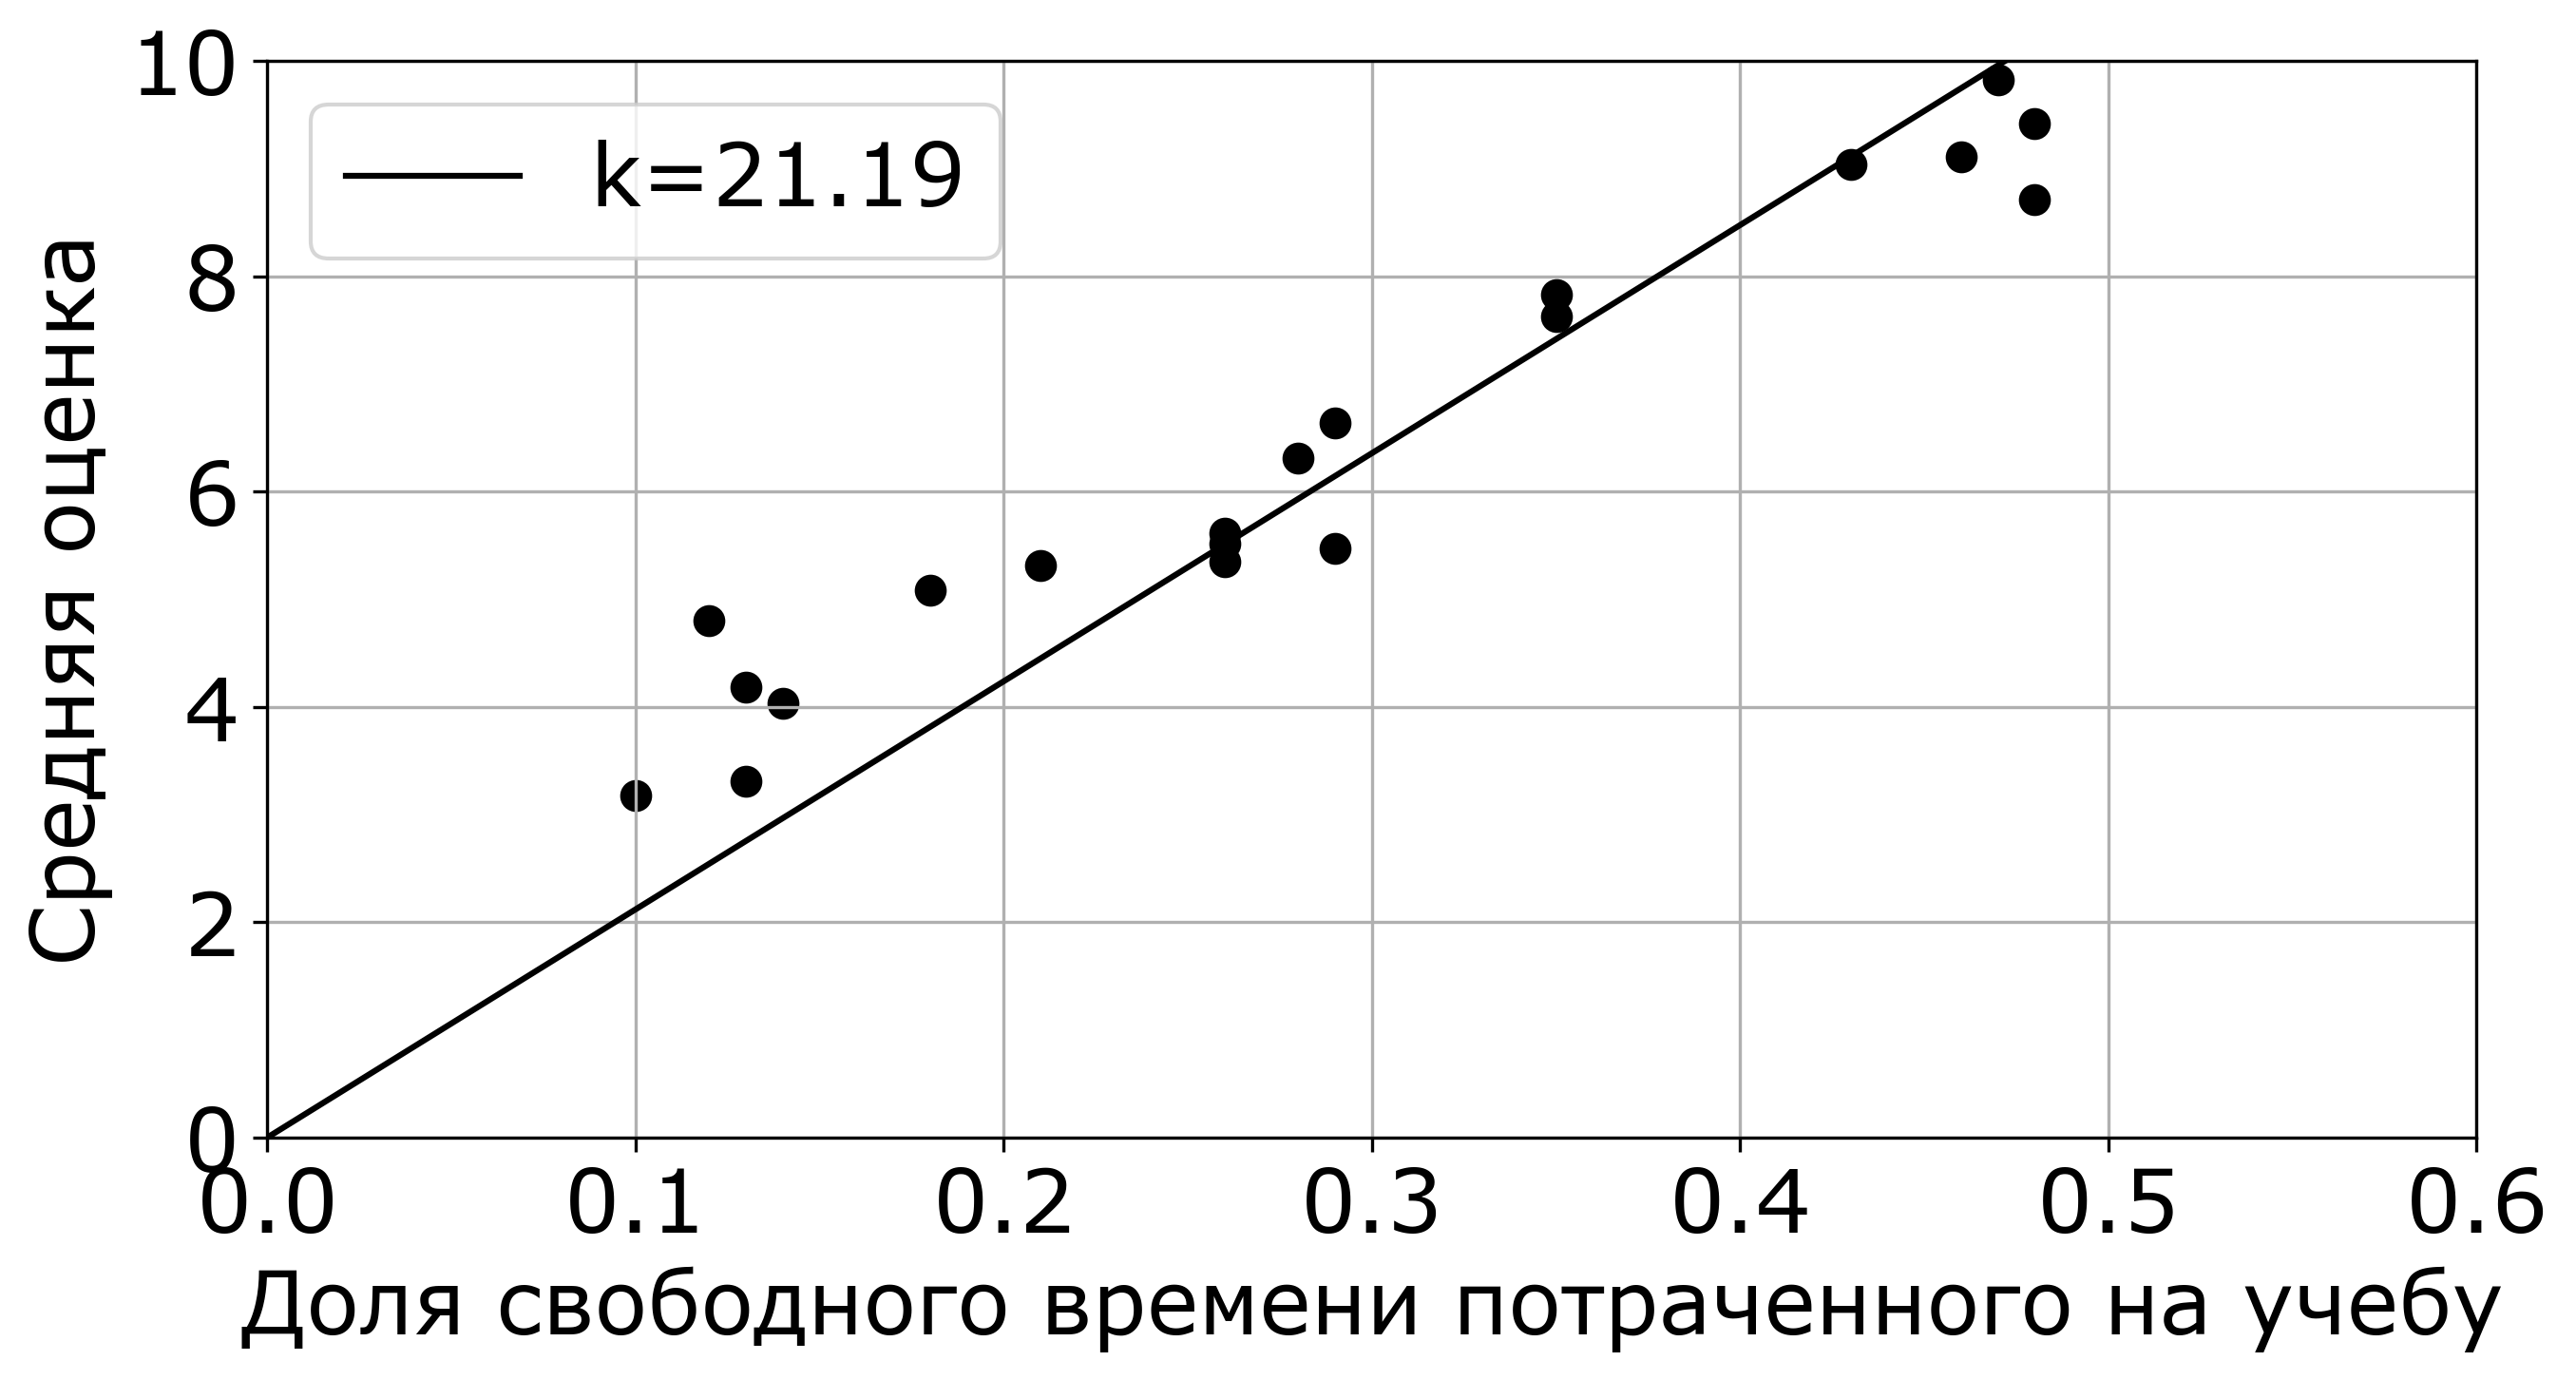

In [29]:
plot_data_and_hyp(X, y, k_a)

**Очень важно!**

Посчитать коэффициент аналитически можно только в данном простом, учебном примере. Но в реальных примерах не всегда возможно решить это уравнение. 

Поэтому, познакомимся с таким алгоритмом как градиентный спуск. 

Данный алгоритм является одним самых распространенных алгоритмов в машинном обучении. 

## Градиентный спуск

Идею градиентной спуска мы обсуждали ранее.

Значение производной в точке равно значению тангенса угла наклона касательной в данной точке или же показывает растет ли функция или убывает.

Допустим мы видим, что производная равна отрицательному значению. Это значит, что функция ошибки в окрестности данной точки убывает. То есть, если взять $k$ поменьше, то ошибка будет расти, а если взять $k$ немоного побольше, то ошибка будет убывать.

А теперь допустим производная положительна. Это значит, что функция ошибки в окрестности данной точки возрастает. То есть, если взять $k$ побольше, то ошибка будет расти, а если поменьше, то ошибка будет убывать.

Тогда наш алгоритм по поиску минимального значения можно описать следящим образом.

Мы берем случайное значение $k$. Считаем значение производной для этого параметра. Если производная положительная, берем новое $k$ чуть меньше чем было, если производная отрицательная, то берем новое значение для $k$ чуть побольше. Это все повторяем до тех пор, пока нас не устроит значение ошибки.

Единственный вопрос, а на какое значение менять $k$?

Хотелось бы менять его на большое значение, когда $k$ мы далеко от минимума функции. И менять $k$ не сильно, когда мы близко к минимуму.

Давайте еще раз посмотрим на функцию и ее производную.

In [30]:
plot_loss_and_der(X, y, der_value=True)

interactive(children=(FloatSlider(value=2.0, description='k', max=40.0, step=2.0), Output()), _dom_classes=('w…

Чем дальше мы от минимума, тем больше (по модулю) значение производной. Так давайте и использовать значение производной, раз нам и так нужно будет ее считать.

Таким образом сам алгоритм градиентного спуска можно описать следующим образом:

* Выбираем случайное значение для $k$
* Повторяем $iter$ раз:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k_{new} = k - \alpha \cdot \dfrac{d  J(k)}{dk}$,

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k = k_{new}$,

где $\alpha$ это коэффициент, который мы выбреем. Он называется коэффициент обучения (learning rate).

$\alpha$ нам нужна, так как иногда производная может быть слишкой большой или слишком маленькой.

Давайте реализуем подсчет производной.

Для входных данных массива $X$, реального выходного значения $y$ и параметра $k$ необходимо реализовать подсчет производной. 

На входе:

* Массив входных значений $X$;

* Массив реальных выходных значений $y$;

* Коэффициент $k$ функции $f(X)=kX$;


На выходе:

* На выходе значение производной функции ошибки $Loss'(k)$

Формула производной функции ошибки:

$Loss'(k) = \dfrac{2}{N} \sum_{i=0}^{N}{(kX_i - y_i)X_i} $


In [31]:
def derivative_function(X, y, k):
    # С помощью f(X, k) мы находим массив предсказанных значений и вычитаем из него массив реальных выходных значений
    # Эту разность мы поэлементно умножаем на массив Х
    # С помощью функции np.mean мы получаем среднее значение массива.
    # np.mean(X) эквивалентной np.sum(X)/len(X)
    
    derivative = 2*np.mean((f(X, k) - y) * X)
    return derivative   

k = 1
print(derivative_function(X, y, k))

-3.89093


Теперь давайте реализуем градиентный спуск.

Для входных данных массива $X$, реального выходного значения $y$, начального значения $k_{init}$, значения параметра $\alpha$ необходимо реализовать градиентный спуск. 

На входе:

* Массив входных значений $X$;

* Массив реальных выходных значений $y$;

* Начальный коэффициент функции $k_{init}$;

* Коэффициент обучения $\alpha$;

* Количество итераций алгоритма $iter$;

На выходе:

* На выходе значение коэффициента $k$

Алгоритм градиентного спуска:

* Выбираем случайное значение для $k$
* Повторяем $iter$ раз:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k_{new} = k - \alpha \cdot \dfrac{d  J(k)}{dk}$,

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k = k_{new}$. 

In [32]:
def gradient_descent(X, y, k_init, alpha, iters):
    
    # инициализируем начальное значение
    k = k_init
    
    # выполняем iters раз
    for i in range(0, iters):
        # считаем производную, умножаем ее на коэффициент обучение
        # меняем коэффициент на значение производной умноженной на альфу
        k = k - (alpha * derivative_function(X, y, k))
        
        # Можно заменить на 
        # k -= alpha * derivative_function(X, y, k)
    # возвращаем посчитанное значение
    return k

k_init = 1.0
alpha = 1
iters = 100
k_gd = gradient_descent(X, y, k_init, alpha, iters)

print(f"Значение после градиентного спуска k={k_gd}")

Значение после градиентного спуска k=21.19269291624745


In [33]:
print(f"Аналитически решенное k={k_a}")

Аналитически решенное k=21.192693


In [34]:
print(f"Значение функции ошибки после обучения {loss_function(X, y, k_gd)}")

Значение функции ошибки после обучения 0.812787655820229


In [35]:
print(f"Значение функции ошибки для аналитического решения {loss_function(X, y, k_a)}")

Значение функции ошибки для аналитического решения 0.8127876558202299


In [36]:
print(f"Разница функция ошибок {loss_function(X, y, k_a) - loss_function(X, y, k_gd)}")

Разница функция ошибок 8.881784197001252e-16


Посмотрим как ведет себя алгоритм с различными параметрами $\alpha$.

Мы можем выбрать начальную точку, коэффициент обучения и количество итераций алгоритма градиентного спуска.

Справа у нас значение функции ошибки и точки, полученные при градиентном спуске. 

Слева у нас полученная функция. 

In [37]:
interactive_gradient_descent(X, y)

interactive(children=(FloatSlider(value=0.0, description='$k$ init:', max=15.0, step=1.0), FloatSlider(value=0…

Увеличивая $\alpha$ мы можем заметить что алгоритму требуется меньше итераций.

Но есть интересный случай. Если мы увеличиваем значение коэффициента $\alpha$, то наш алгоритм начинает расходиться.

## Как это можно использовать?

Возможно, дойдя до такого момента, вы можете спросить: это что мне нужно каждый раз производные считать, если я хочу просто линейную регрессию посчитать?

Ответ: нет.

Конечно существуют готовые решения.

Есть замечательная библиотека sklearn. Используя ее, мы можем в 3 строчки посчитать линейную регрессию. Сделаем это.

In [38]:
# загружаем линейную регрессию из библиотеки sklearn
# в ней реализован класс LinearRegression
from sklearn.linear_model import LinearRegression

# создаем объект линейной регрессии. не обращайте внимание на атрибут fit_intercept
lr = LinearRegression(fit_intercept=False)

# обучаем нашу модель. То есть, запускаем алгоритм, который находит оптимальные параметры. 
# нужно будет немного поменять shape входных данных
lr.fit(X.reshape(-1, 1), y.reshape(-1, 1))

# И получаем значение коэффициента
k_sklearn = lr.coef_[0, 0]

In [39]:
print(f"Значение после градиентного спуска k={k_gd}")
print(f"Аналитически решенное k={k_a}")
print(f"Значение коэффициента посчитанное с помощью skealrn k={k_sklearn}")

Значение после градиентного спуска k=21.19269291624745
Аналитически решенное k=21.192693
Значение коэффициента посчитанное с помощью skealrn k=21.1926929264622


In [40]:
print(f" Абсолютная разница между коэффициентами посчитанным нами и посчитанным sklean'ом {abs(k_gd - k_sklearn)}")

 Абсолютная разница между коэффициентами посчитанным нами и посчитанным sklean'ом 1.0214751711146164e-08


Давайте посмотрим на наш конечный результат.

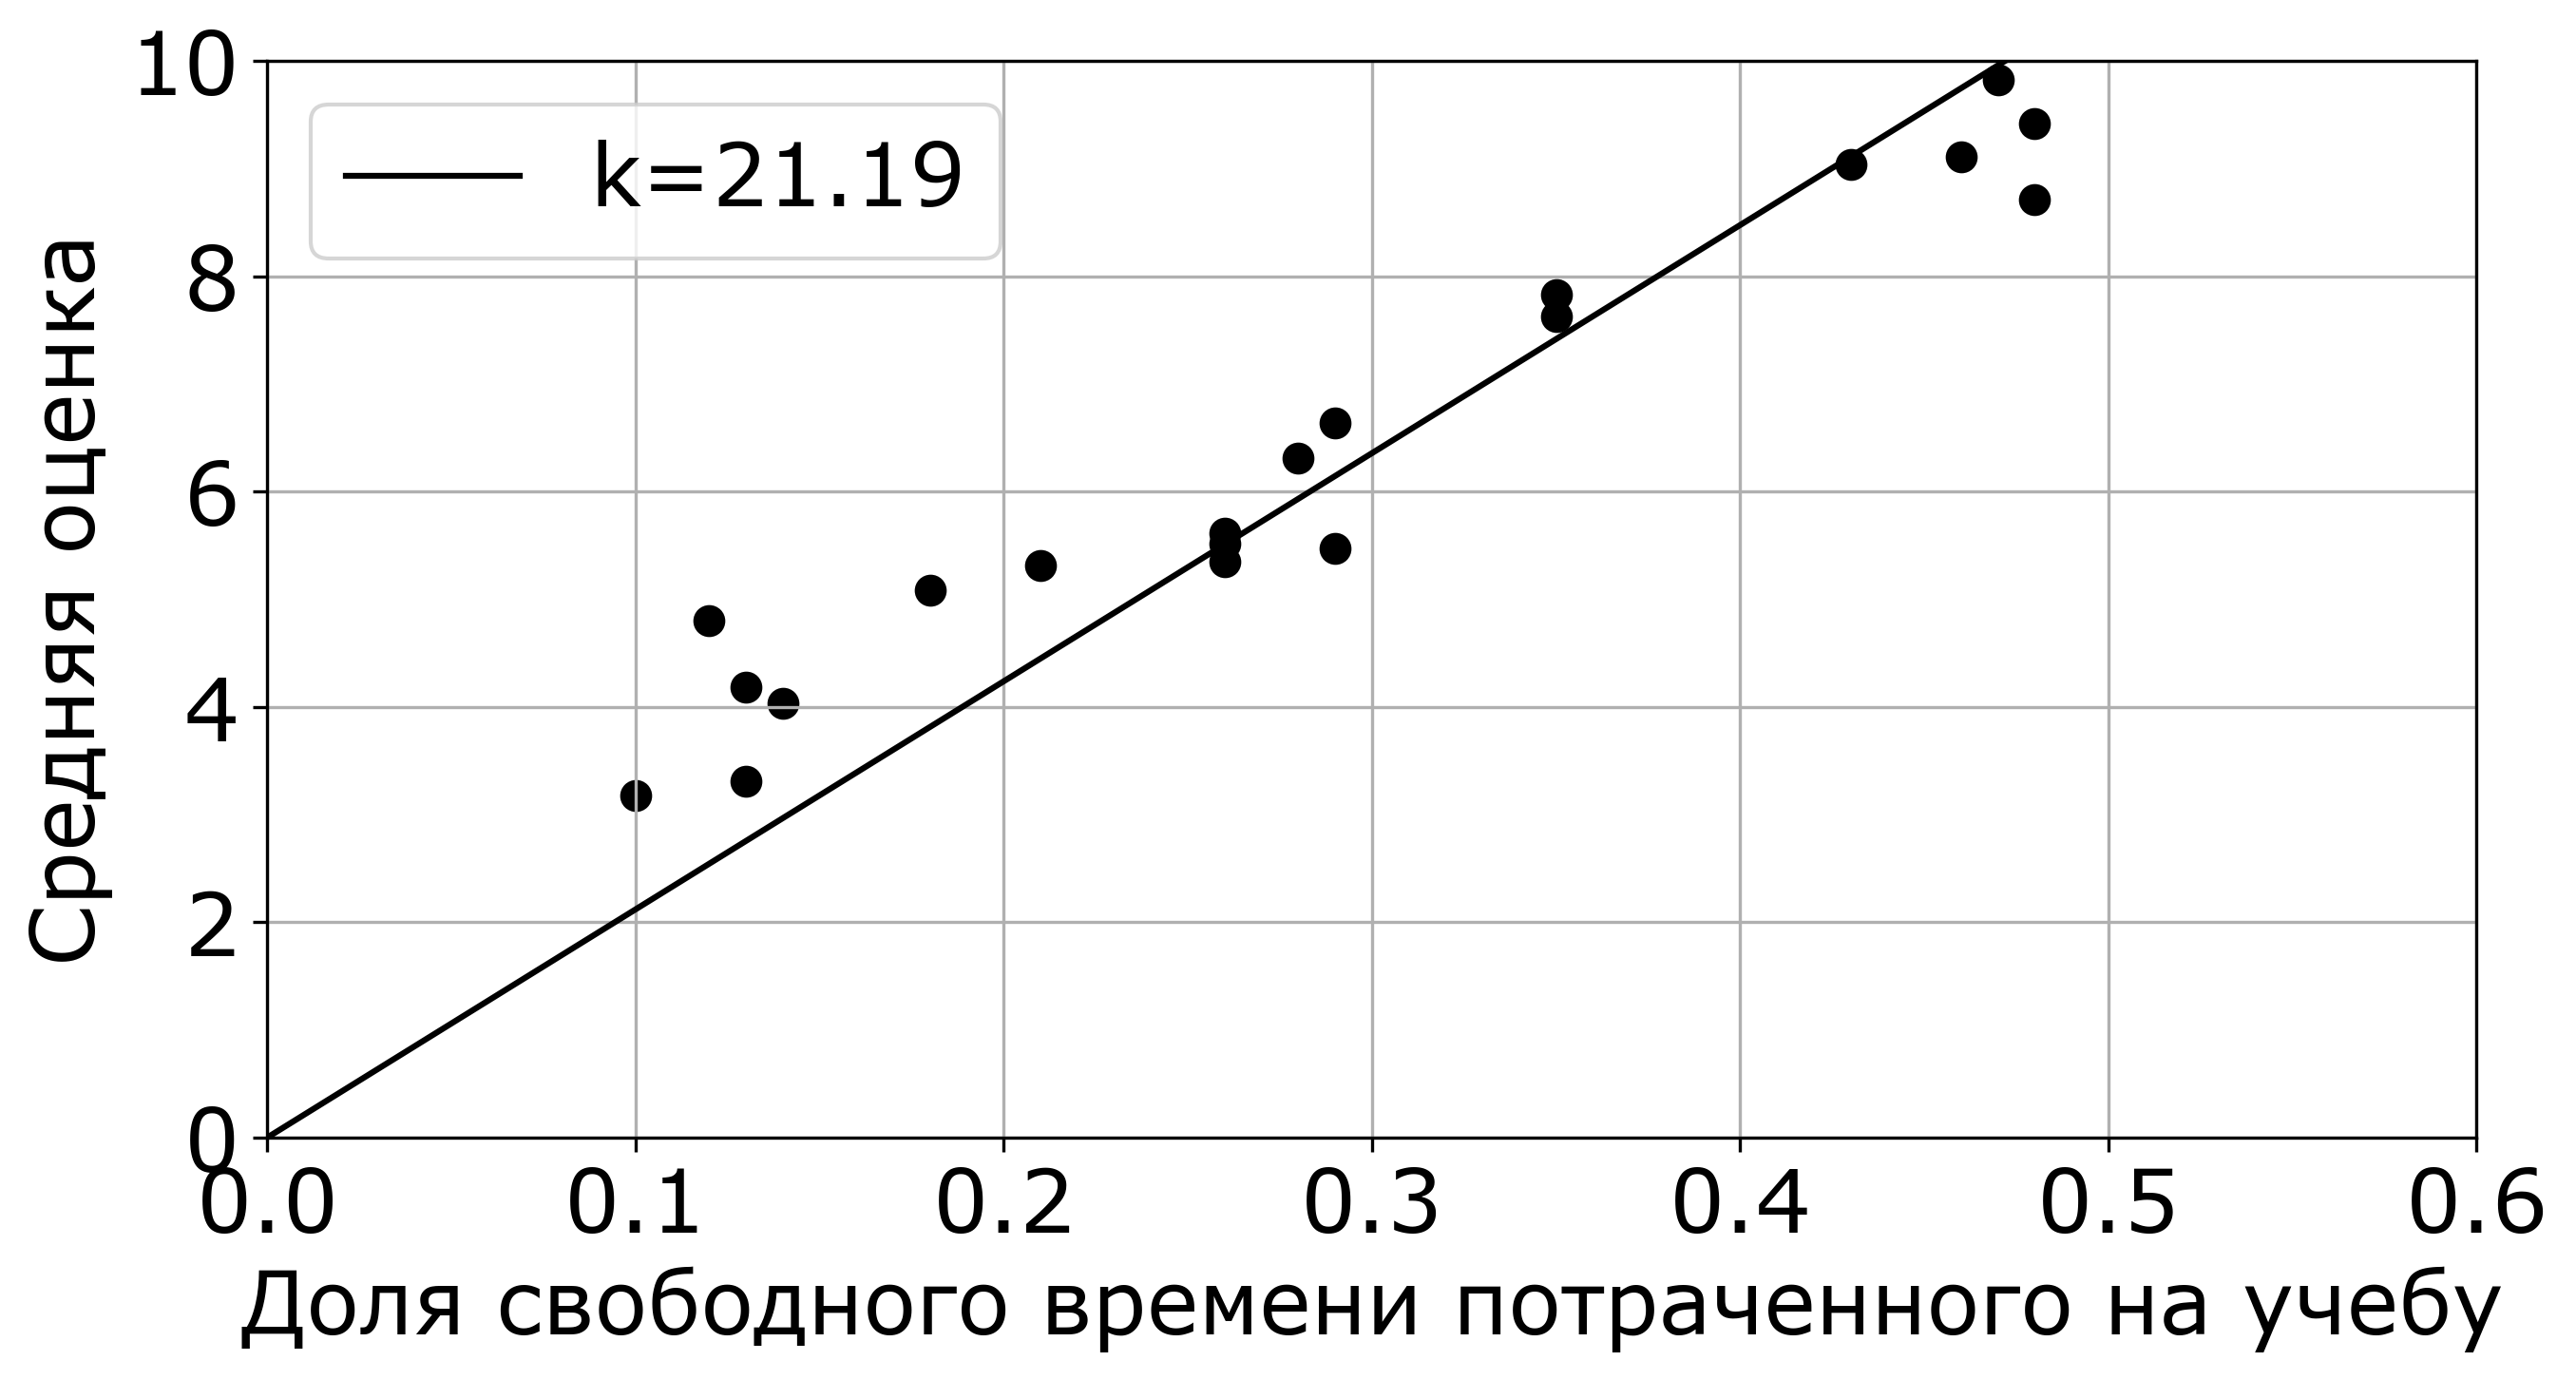

In [41]:
plot_data_and_hyp(X, y, k_gd)

# Немного усложним пример

Можно заметить, что функция выходит из 0 по оси $Y$. Но кажется что она должна выходить из 1.

В качестве гипотезы мы использовали функцияю вида $f(X) = kX$.

Такой вид фукнции всегда будет выходить из 0.

Я называл функцию $f(X) = kX$ линейной функцией. Но многие из вас могли заметить, что это не совсем линейная функция. 

Линейная функцию на самом деле выглядит так:

$f(X) = kX + b$.

Давайте на нее посмотрим.

In [42]:
choose_slope_with_bias(X, y)

interactive(children=(FloatSlider(value=2.0, description='k', max=40.0, step=2.0), FloatSlider(value=0.0, desc…

Давайте изменим гипотезу и теперь будем использовать "настоящую" линейную функцию.

Давайте ее реализуем.

Для каждого элемента $X_i$ массива $X$ реализовать фукнуию $f(X_i) = kX_i + b$.

На входе:
* Массив ndarray $X$;

* Значение коэффициента $k$;

* Значение коэффициента $b$;

На выходе:
* На выходе массив ndarray со значениями $f(X_i) = kX_i + b$;

In [43]:
def f(X, k, b):
    return k*X + b

k = 10
b = -10
print(f(X, k, b))

[-9.  -8.8 -8.7 -8.7 -8.6 -8.2 -7.9 -7.4 -7.4 -7.4 -7.2 -7.1 -7.1 -6.5
 -6.5 -5.7 -5.4 -5.3 -5.2 -5.2]


Перепишем функцию ошибки:

$\hat{y} = f(X) = kX + b$. То есть, $\hat{y}$ является предсказанными нами значениями для $X$. 
А настоящие значения будут равны $y$. 

Тогда ошибка на одном примере равна $error_i(k, b)$ на i-ом примере будет равна:

$error_i(k, b) = (\hat{y_i} - y_i)^2 = ((kX_i + b) - y_i)^2$.

А на всех примерах:

$Loss(k, b) = \dfrac{1}{N}\sum_{i=0}^{N}{(\hat{y_i} - y_i)^2}= \dfrac{1}{N} \sum_{i=0}^{N}{((kX_i + b) - y_i)^2} $



Реализуем ее.

Для входных данных массива $X$ и реального выходного значения $y$ необходимо реализовать функцию ошибки. 

На входе:

* Массив входных значений $X$

* Массив реальных  выходных значений $y$

* Коэффициент $k$ функции 

* Коэффициент $b$ функции 

На выходе:

* На выходе значение фуникции ошибки $Loss(k, b)$

Формула функции ошибки:

$Loss(k, b) = \dfrac{1}{N} \sum_{i=0}^{N}{((kX_i + b)- y_i)^2} $

In [44]:
def linearn_loss_function(X, y, k, b):
    # Эта функция ошибки идентична предыдущей. 
    # За исключение другой линейной функции    
    return np.mean(( f(X, k, b) - y)**2)

k = 0
и = 0
print(linearn_loss_function(X, y, k, b))

270.44424


Можно заметить, что теперь у нас ошибка зависит не только от $k$, но и от $b$.

Давайте посмотрим, как теперь выглядит функция ошибки. 

Но так как она теперь зависит от 2-х параметров, то теперь для ее визуализации нам нужно 3D пространство.


In [45]:
plot_linear_loss_in_3d(X, y)

interactive(children=(IntSlider(value=90, description='Вертикальное', max=90), IntSlider(value=90, description…

Но проще всего нам просто смотреть на функцию сверху.

График ниже, это как бы вид сверху на 3D функцию.

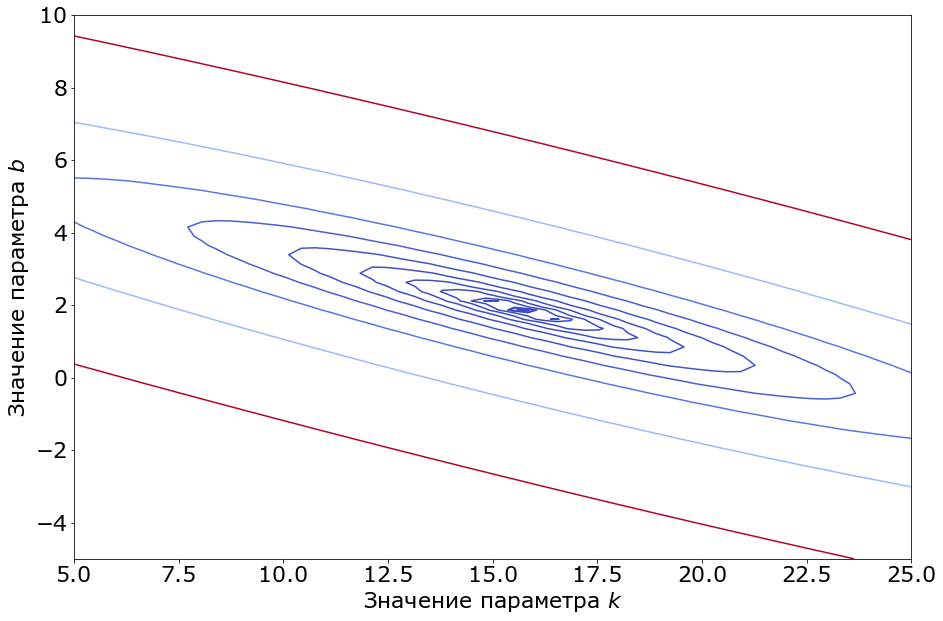

In [46]:
plot_linear_loss_in_3d_up(X, y)

Хорошо. 

У нас есть функция ошибки. Но теперь она от двух параметров. Что нам теперь делать?

Алгоритм, который мы использовали, называется градиентный спуск. 

Он так называется не спроста.

## Градиент

Давайте введем понятие градиента.

Градиент функции $\phi(x_0, x_1, \ldots x_N)$ от $N$ переменных это $N$ значений: 

$\dfrac{\delta \phi(x_0, x_1, \ldots x_N)}{\delta x_0}, \dfrac{\delta \phi(x_0, x_1, \ldots x_N)}{\delta x_1}, \ldots \dfrac{\delta \phi(x_0, x_1, \ldots x_N)}{\delta x_N}$

Обозначается как $grad (\phi)$ или  $\nabla \phi$ (читается как набла фи)

Например, градиент функции $\phi(x, y)$  от двух переменных это:

$grad (\phi) = \nabla \phi = \left[\dfrac{\delta \phi(x, y)}{\delta x}; \dfrac{\delta \phi(x, y)}{\delta y} \right]$

Эти значения можно считать координатами вектора (в декартовой системе координат) и их можно записать как: 

$grad (\phi) = \nabla \phi = \dfrac{\delta \phi(x, y)}{\delta x} \cdot \overleftarrow{i} + \dfrac{\delta \phi(x, y)}{\delta y} \cdot \overleftarrow{j}$

$\dfrac{\delta \phi(x, y)}{\delta x}$ - это *частная* производная по $x$.

Соответственно, $\dfrac{\delta \phi(x, y)}{\delta y}$ - это частная производная по $y$.

Что это значит? 

Частная производная - это производная по какой-либо переменной, например $x$, где остальные переменные мы считаем константой.

### Пример вычисления градиента

$\phi(x, y) = (1.5x + 2.5)^2 + 2.5y^2 + 0.5$

$\dfrac{\delta \phi(x, y)}{\delta x} =
\dfrac{\delta (1.5x + 2.5)^2 }{\delta x} +
\dfrac{\delta (2.5y^2)  }{\delta x} +
\dfrac{\delta (0.5) }{\delta x}
= 1.5 \cdot 2(1.5x + 2.5) + 0 + 0= 4.5x + 7.5$
 

$\dfrac{\delta \phi(x, y)}{\delta y} =
\dfrac{\delta (x + 1.5)^2 }{\delta y} +
\dfrac{\delta (2.5y^2)  }{\delta y} +
\dfrac{\delta (0.5) }{\delta y}
= 0 + 2 \cdot 2.5y + 0= 5y$

Давайте визуализируем  функцию $\phi(x, y) = (x + 1.5)^2 + 2.5y^2 + 0.5$.

In [47]:
plot_func_in_3d()

interactive(children=(IntSlider(value=0, description='Вертикальное', max=90), IntSlider(value=0, description='…

Рассмотрим ее сверху.

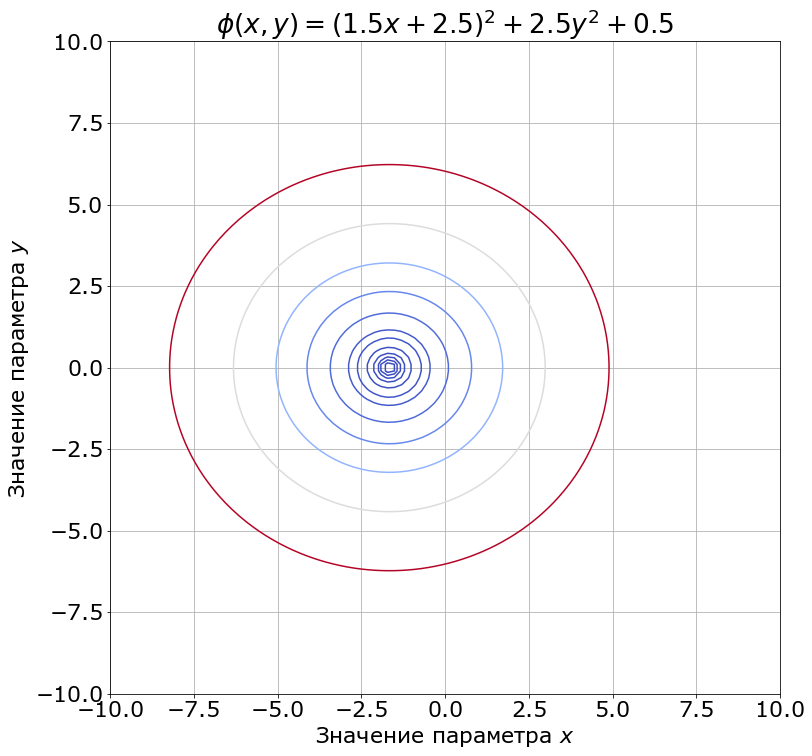

In [48]:
plot_3d_func_with_grad()

Теперь посчитаем на ее градиент (подробно он был рассчитан выше).

$\phi(x, y) = (1.5x + 2.5)^2 + 2.5y^2 + 0.5$

$\dfrac{\delta \phi(x, y)}{\delta x} = 4.5x + 7.5$

$\dfrac{\delta \phi(x, y)}{\delta y} = 5y$

Тогда сам градиент из точки (0.4; 0.8) это вектор с началом из этой точки, который направленный в сторону **от** минимума.

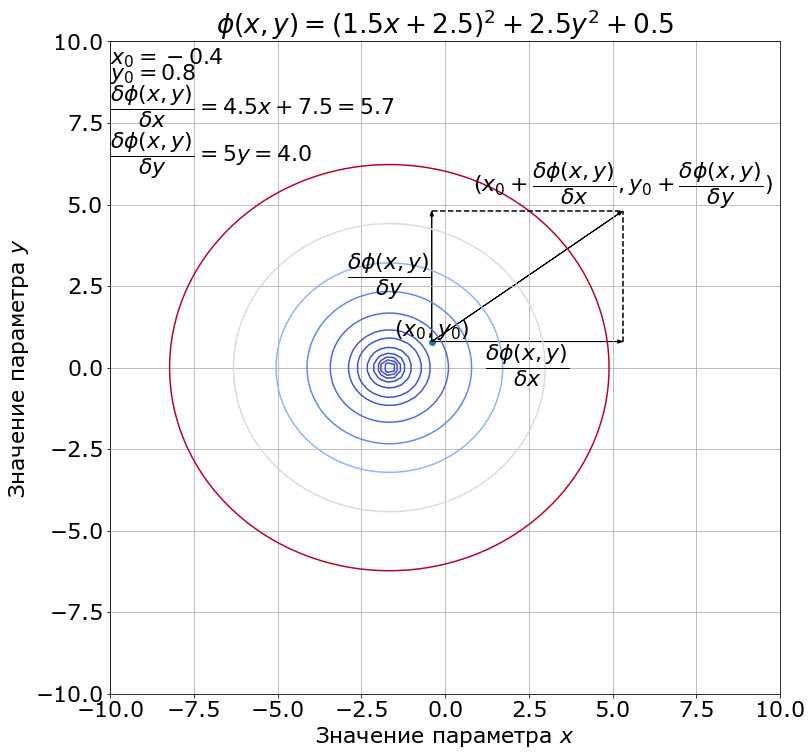

In [49]:
plot_3d_func_with_grad(x0=-0.4, y0=0.8, pos_neg_grad='positive')

И если мы возьмем отрицательный градиент (антиградиент), то этот вектор будет направлен **в** сторону минимума.

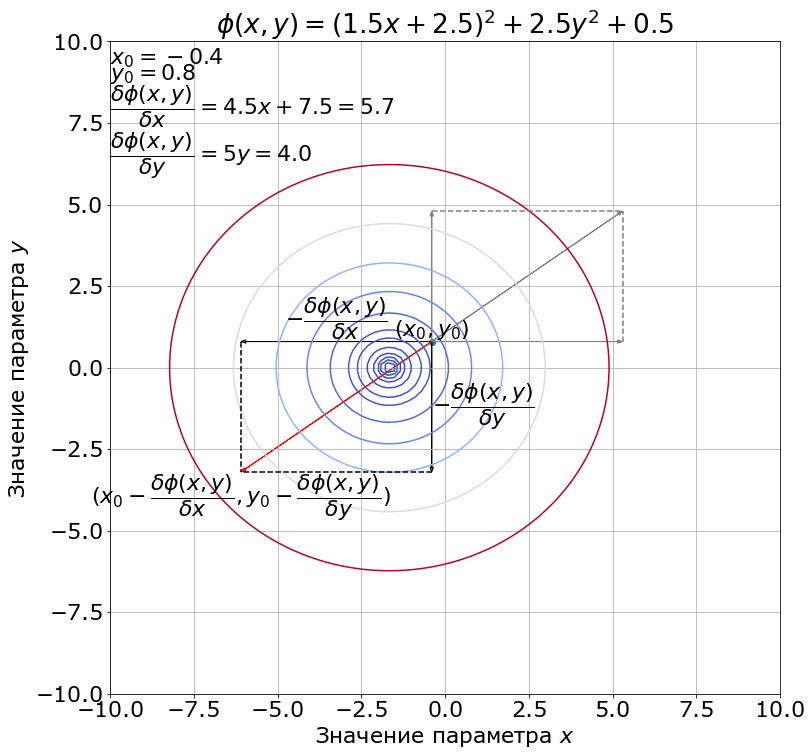

In [50]:
plot_3d_func_with_grad(x0=-0.4, y0=0.8, pos_neg_grad='negative')

Ниже можно посмотреть значения градиента и антиградиента для разных точек. 

Тут наглядно можно увидеть, что, что бы попасть в минимум нужно обязательно уменьшать градиент коэффициентом $\alpha$.

In [51]:
plot_3d_func_with_grad_interactive()

interactive(children=(FloatSlider(value=0.0, description='x0', max=10.0, min=-10.0), FloatSlider(value=1.0, de…

### Градиент функции ошибки

Зная все это, мы можем найти градиент нашей функции ошибки и использовать его для поиска минимума.

Наша функция ошибки зависит от двух параметров $k, b$:

$Loss(k, b) = \dfrac{1}{N}\sum_{i=1}^{N}{(\hat{y_i} - y_i)^2}= \dfrac{1}{N} \sum_{i=1}^{N}{( (k X + b)  - y_i)^2}$

Тогда градиент функции ошибки будет следующий:

$\dfrac{\delta  Loss(k, b)}{\delta b} = \dfrac{1}{N} \sum_{i=1}^{N} 2((k X_i + b)  - y_i)\dfrac{\delta ((k X_i + b)  - y_i) }{\delta b}$ 

$\dfrac{\delta  Loss(k, b)}{\delta b} = \dfrac{2}{N} \sum_{i=1}^{N} ((k X_i + b)  - y_i)( 0 + 1 + 0)$ 

$\dfrac{\delta  Loss(k, b)}{\delta b} = \dfrac{2}{N} \sum_{i=1}^{N} ((k X_i + b)  - y_i)$ 

$\dfrac{\delta Loss(k, b)}{\delta k} = \dfrac{1}{N} \sum_{i=1}^{N} 2((k X_i + b)  - y_i)\dfrac{\delta ((k X_i + b)  - y_i) }{\delta k}$ 

$\dfrac{\delta  Loss(k, b)}{\delta k} = \dfrac{2}{N} \sum_{i=1}^{N} ((k X_i + b)  - y_i)( X_i + 0 + 0)$ 

$\dfrac{\delta  Loss(k, b)}{\delta k} = \dfrac{2}{N}\sum_{i=1}^{N} ((k X_i + b)  - y_i)X_i$ 

$\nabla Loss(k, b) = \left[\dfrac{2}{N} \sum_{i=1}^{N} ((k X_i + b)  - y_i)X_i ; \dfrac{2}{N}\sum_{i=1}^{N} ((k X_i + b)  - y_i) \right]$

Давайте реализуем градиент.

Для входных данных массива $X$, реального выходного значения $y$ и параметров $k$ и $b$ необходимо реализовать подсчет производной. 

На входе:

* Массив входных значений $X$;

* Массив реальных выходных значений $y$;

* Коэффициент $k$;

* Коэффициент $b$;

На выходе:

* На выходе массив значений градиента функции ошибки $\nabla Loss(k, b)$.

Нулевой элемент выходного массива - это частная производная по $k$, первый элемент частная производная по $b$.

Формула градиента функции ошибки:

$\nabla Loss(k, b) = \left[\dfrac{2}{N} \sum_{i=1}^{N} ((k X_i + b)  - y_i)X_i ; \dfrac{2}{N}\sum_{i=1}^{N} ((k X_i + b)  - y_i) \right]$


In [52]:
def gradient_function(X, y, k, b):
    # С помощью f(X, k, b) мы находим массив предсказанных значений и вычитаем из него массив реальных выходных значений
    # Эту разность мы поэлементно умножаем на массив Х
    # С помощью функции np.mean мы получаем среднее значение массива.
    # np.mean(X) эквивалентной np.sum(X)/len(X)
                        
    grad_k = 2*np.mean( ((k * X + b) - y) * X)
    grad_b = 2*np.mean( ((k * X + b) - y))
    return np.array([grad_k, grad_b])

k = 5
b = 1
print(gradient_function(X, y, k, b))

[-2.55317 -7.801  ]


Тогда алгоритм градиентного спуска теперь можно переписать как:

* Выбираем случайное значение для $k$ и $b$
* Повторяем $iter$ раз:

    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $b_{new} = b  - \alpha \cdot \dfrac{\delta J(k, b)}{\delta b} $ 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k_{new} = k - \alpha \cdot \dfrac{\delta J(k, b)}{\delta k} $ 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $b = b_{new}$, 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  $k = k_{new}$
    

где $\alpha$ это коэффициент обучения.

Реализуем градиентный спуск.

Для входных данных массива $X$, реального выходного значения $y$, начальных значений $k_{init}$ и $b_{init}$, значения параметра $\alpha$ необходимо реализовать градиентный спуск. 

На входе:

* Массив входных значений $X$;

* Массив реальных выходных значений $y$;

* Начальный коэффициент функции $k_{init}$;

* Начальный коэффициент функции $b_{init}$;

* Коэффициент обучения $\alpha$;

* Количество итераций алгоритма $iter$;

На выходе:

* На выходе значение коэффициентов $k$ и $b$.


In [53]:
def gradient_descent(X, y, k_init, b_init, alpha, iters):
    k = k_init
    b = b_init
    for i in range (0, iters):
        gradients = gradient_function(X, y, k, b)
        k = k - (alpha * gradients[0])
        b = b - (alpha * gradients[1])
    
    return k, b


k_init = -5
b_init = 0
alpha = 0.75
iters = 500


k_gd, b_gd = gradient_descent(X, y, k_init, b_init, alpha, iters)
print(f"Значения коэффициентов k={k_gd} и b={b_gd}")

Значения коэффициентов k=15.692534889919942 и b=1.8691674397432398


In [54]:
print(f"Значение функции ошибки после обучения {linearn_loss_function(X, y, k_gd, b_gd)}")

Значение функции ошибки после обучения 0.23360851804037344


Визуализируем результат.

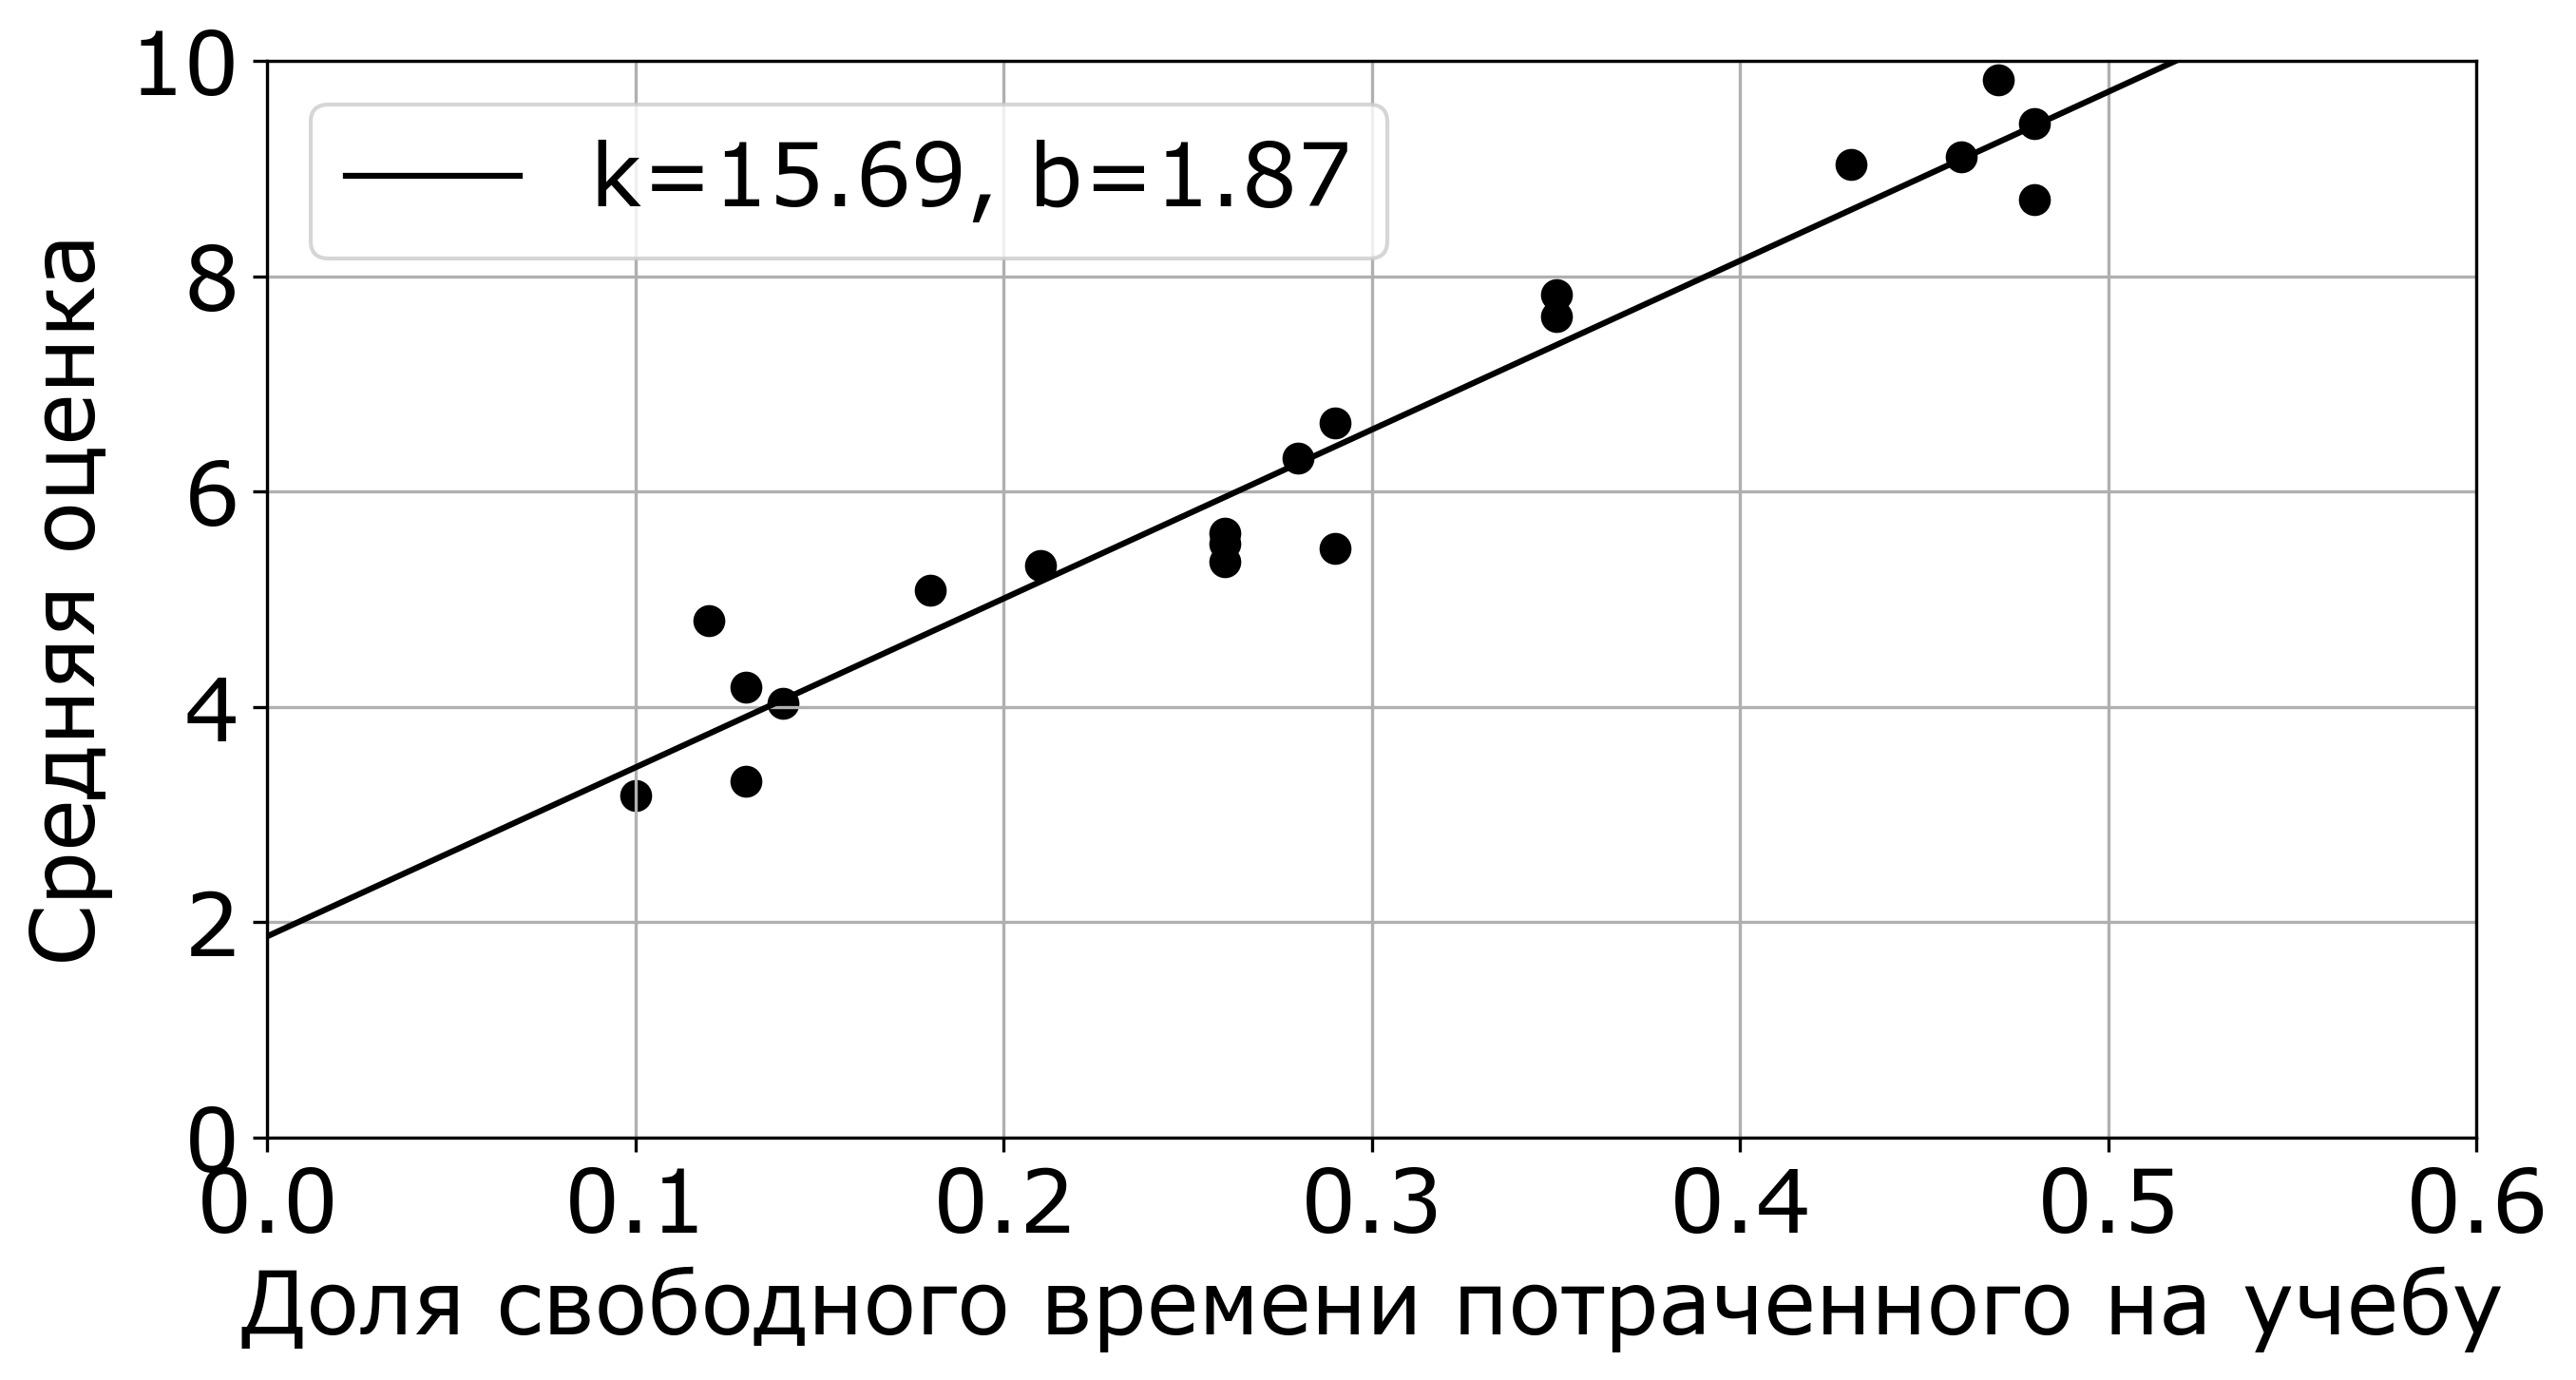

In [55]:
plot_data_and_hyp_with_bias(X, y, k_gd, b_gd)

Давайте посмотрим как наш градиентный спуск работал.

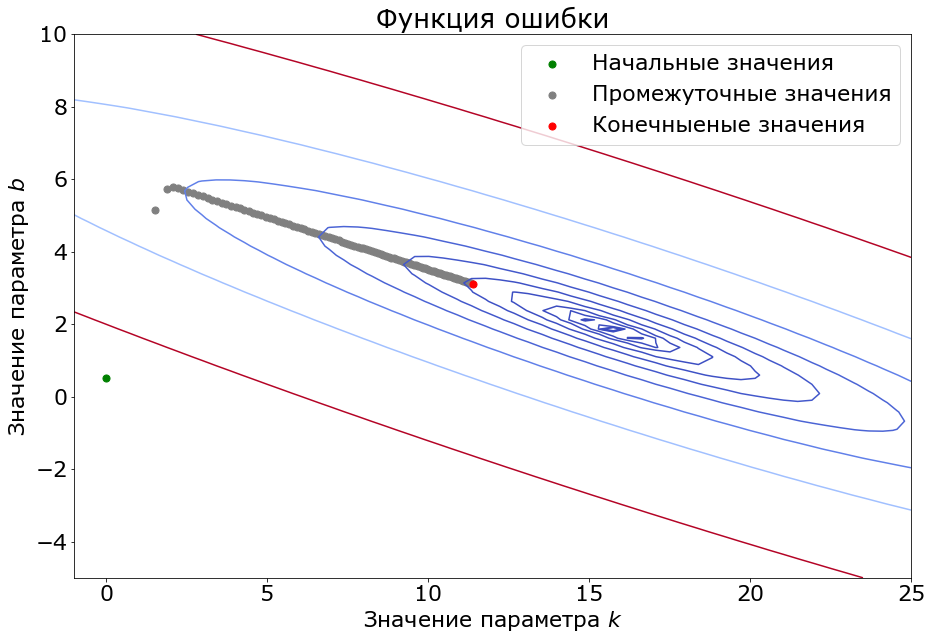

In [56]:
#alpha=0.75 интересный случай
plot_gradient_descent_in_3d(X, y, iters=100, alpha=0.4)

Давайте теперь посмотрим, как высчитывался градиент и менялась целевая функция на разных итерациях градиентного спуска.

In [57]:
plot_gradient_descent_in_3d_interactive(X, y, iters=200, alpha=0.6)

interactive(children=(IntSlider(value=-1, description='iter', max=200, min=-1), Output()), _dom_classes=('widg…

### Приминение sklearn для решения задачи линейной регресии

In [58]:
# создаем объект линейной регрессии. 
lr = LinearRegression()

# до этого мы создавали его так LinearRegression(fit_intercept=False)
# этот параметр отвечал за вид функции 
# при fit_intercept=False используется функция f(x) = kx
# если не указывать этот параметр, то используется функция f(x) = kx + b

# обучаем нашу модель
lr.fit(X.reshape(-1, 1), y.reshape(-1, 1))

# И получаем значение коэффициентов
k_sklearn = lr.coef_[0, 0]
b_sklearn= lr.intercept_[0]

In [59]:
print(f"Значения коэффициентов k={k_sklearn} и b={b_sklearn}")

Значения коэффициентов k=15.692789281745474 и b=1.8690942386251583


In [60]:
print(f"Значение функции ошибки после обучения {linearn_loss_function(X, y, k_sklearn, b_sklearn)}")

Значение функции ошибки после обучения 0.233608517005525


In [61]:
print(f"Значение коэффициентов после градиентного спуска k={k_gd}, b={b_gd},  ")
print(f"Значение коэффициентов посчитанное с помощью skealrn k={k_sklearn}, b={b_sklearn}")

Значение коэффициентов после градиентного спуска k=15.692534889919942, b=1.8691674397432398,  
Значение коэффициентов посчитанное с помощью skealrn k=15.692789281745474, b=1.8690942386251583


In [62]:
print(f"Абсолютная разница между параметрами k: {abs(k_gd - k_sklearn)}")

Абсолютная разница между параметрами k: 0.0002543918255319966


In [63]:
print(f"Абсолютная разница между параметрами b: {abs(b_gd - b_sklearn)}")

Абсолютная разница между параметрами b: 7.320111808151175e-05


In [64]:
print(f"Абсолютная разница ошибок {linearn_loss_function(X, y, k_gd, b_gd) - linearn_loss_function(X, y, k_sklearn, b_sklearn)}")

Абсолютная разница ошибок 1.0348484291711202e-09


# Чему мы сегодня научились

* Линейная функция
* Функция потерь
* Производная
* Градиентный спуск
* Применение регрессии из sklearn

# Что дальше

* Что если наша целевая функция зависит от нескольких параметров?

* Что если нам нужно создать "кривую" функцию?

* Что такое нормализация данных

# Приложение

## Не строгое доказательство положительной производной при росте функции

Допустим в окрестности точки $x_1$ функция возрастает:

$x_2 > x_1$,

$f(x_2) > f(x_1)$.

тогда если мы возьмем положительный $\Delta$ то значение производной будет положительной

$f(x_0 + \Delta x) > f(x_0) $,

$f(x_0 + \Delta x) - f(x_0) > 0$,

$\Delta x > 0$.

Следовательно $\dfrac{f(x_0 + \Delta x) - f(x_0)}{\Delta x} > 0$.

Если мы возьмем отрицательный $\Delta$ то значение производной также будет положительной:

$ f(x_0 - \Delta x) < f(x_0)$,

$f(x_0 + \Delta x) - f(x_0) < 0$,

$\Delta x < 0$,

Следовательно $\dfrac{f(x_0 - \Delta x) - f(x_0)}{-\Delta x} > 0$.

Если в окрестности точки $x_1$ функция убывает, то производная будет отрицательная.

*Ответственность за доказательство этого утверждения я передаю читателю данного ноутбука*.